# Braintracer Dopamine Analysis

In [1]:
from braintracer.braintracer import file_management as btf
from braintracer.braintracer import analysis as bt
from braintracer.braintracer import plotting as btp
import matplotlib.pyplot as plt
import numpy as np

In [6]:
## DEFINE YOUR EXPERIMENT
bt.postsyn_region = 'VTA' # You must set a starter region to use some features
# For quantifications comparing pre and postsynaptic cell populations, you must set the following:
bt.postsyn_ch = 'r' # The channel(s) containing starter cells (postsynaptics)
bt.presyn_ch = 'r' # The channel(s) containing input cells (presynaptics)
bt.presyn_regions_exclude = [''] # Presynaptic cells are the total cells in presyn_ch - (postsyn_region + presyn_regions_exclude)

bt.channel_colours = ['r','g','b'] # ordered list of colours channels will take ['r','g','b'] by default
bt.network_name = 'bt14' # default is Unet
bt.grouped = True #True # True by default, set to False if you only have one group
bt.debug = False # False by default

In [3]:
bt.Dataset('SC004', 'Empty', ['r'], fluorescence=True);

In [4]:
bt.Dataset('SC026', 'DA', ['r'], fluorescence=True);
bt.Dataset('SC032', 'DA', ['r'], fluorescence=True);
bt.Dataset('SC033', 'DA', ['r'], fluorescence=True);

# SC046 and SC047 pcp2/DAT mice just show slices for them because higher resolution
#bt.Dataset('SC026', 'DA', ['r']); # also ran with cellfinder
#bt.Dataset('SC032', 'DA', ['r']);
#bt.Dataset('SC033', 'DA', ['r']);
title = '_'.join([i.name for i in bt.datasets])

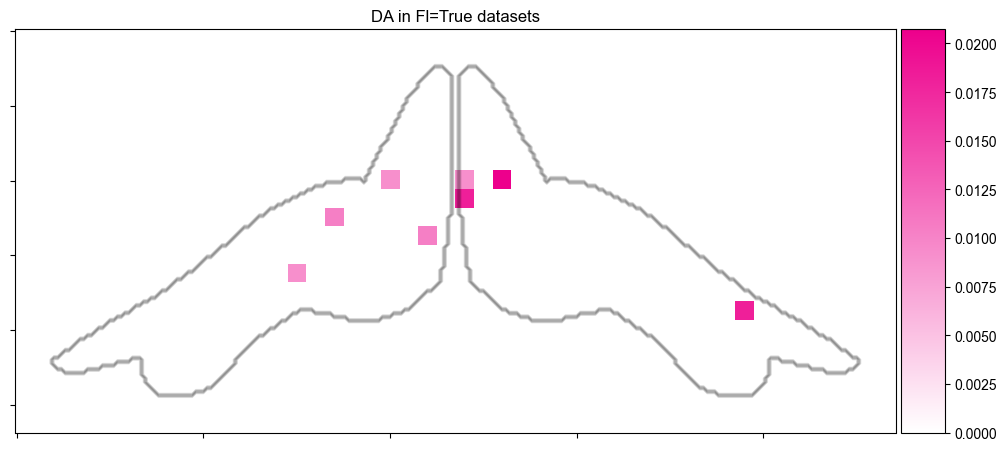

In [5]:
btp.probability_map('r', True, area_num=83, binsize=50, axis=2, sigma=None, subregions=None, subregion_depth=None, projcol='k', padding=10, vmax=None)

C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\seaborn\categorical.py:638: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(vals, index=index)


ValueError: min() arg is an empty sequence

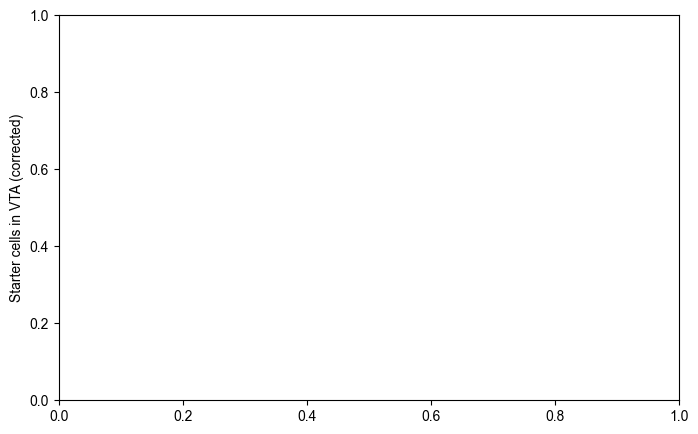

In [6]:
btp.generate_starter_cell_bar()

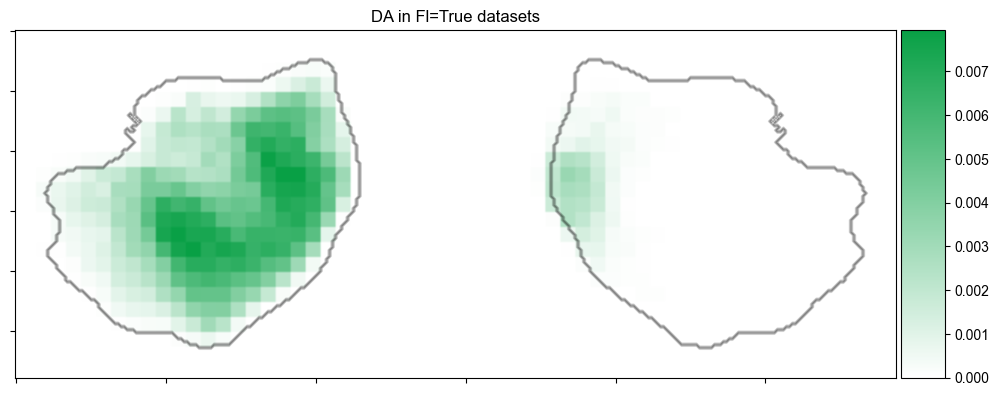

In [4]:
btp.probability_map('r', True, area_num=749, binsize=50, axis=2, sigma=None, subregions=None, subregion_depth=None, projcol='k', padding=10, vmax=None)

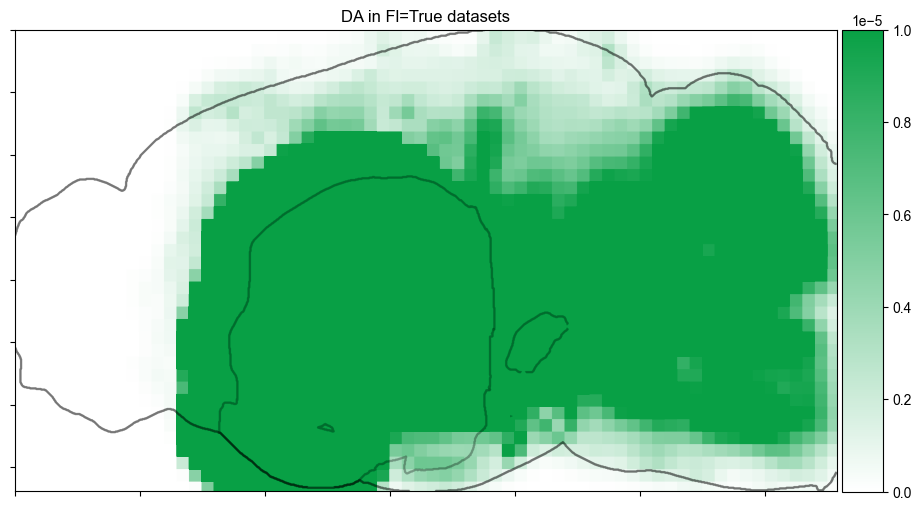

In [5]:
btp.probability_map('r', True, area_num=997, binsize=200, axis=0, sigma=None, subregions=[83, 749, 485, 493], subregion_depth=None, projcol='k', padding=0, log=False, vmax=0.00001)

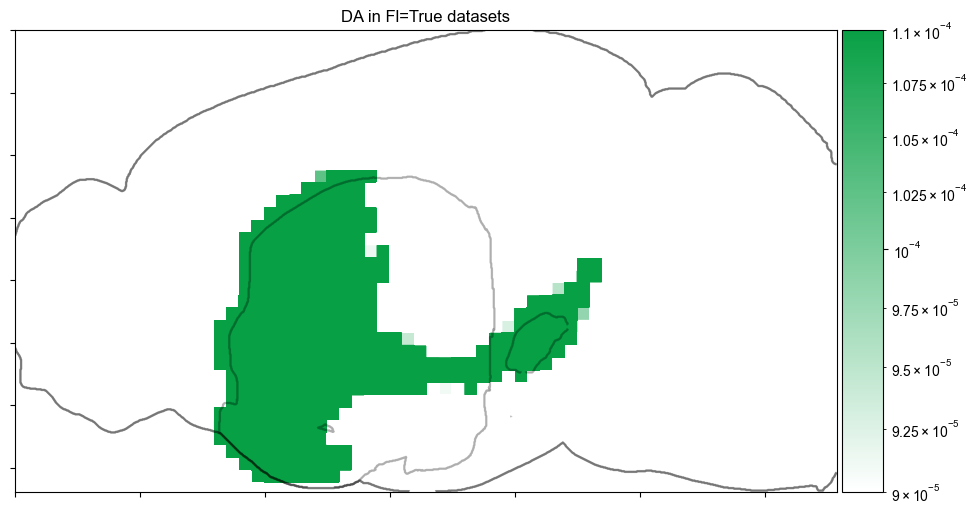

In [6]:
btp.probability_map('r', True, area_num=997, binsize=200, axis=0, sigma=None, subregions=[83, 749, 485, 493], subregion_depth=None, projcol='k', padding=0, log=True, vmax=0.0001)

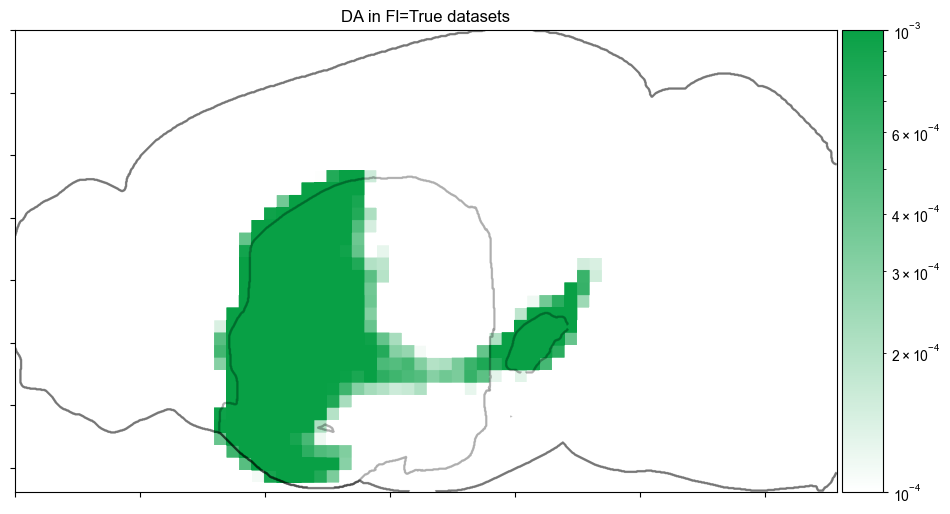

In [4]:
btp.probability_map('r', True, area_num=997, binsize=200, axis=0, sigma=None, subregions=[83, 749, 485, 493], subregion_depth=None, projcol='k', padding=0, log=True, vmax=0.001)

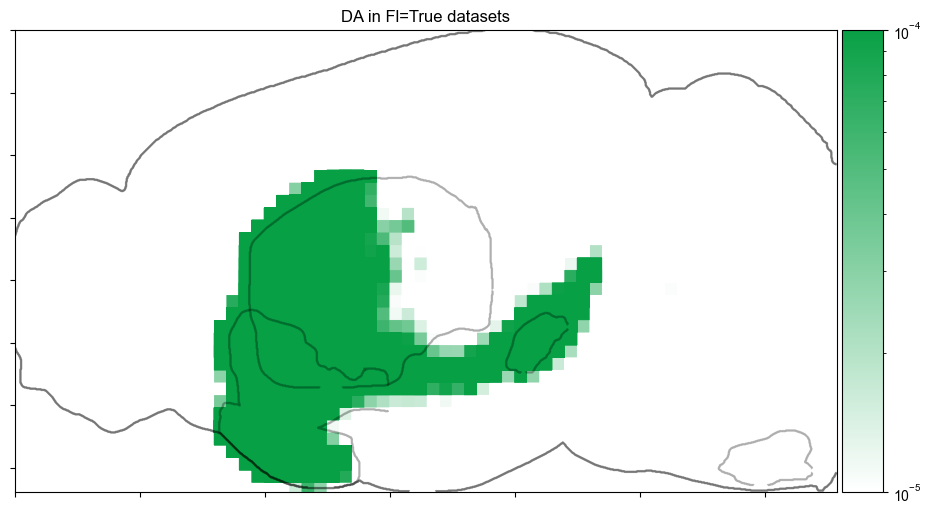

In [5]:
btp.probability_map('r', True, area_num=997, binsize=200, axis=0, sigma=None, subregions=[83, 749, 485, 493], subregion_depth=None, projcol='k', padding=0, log=True, log_min=0.00001, vmax=0.0001)

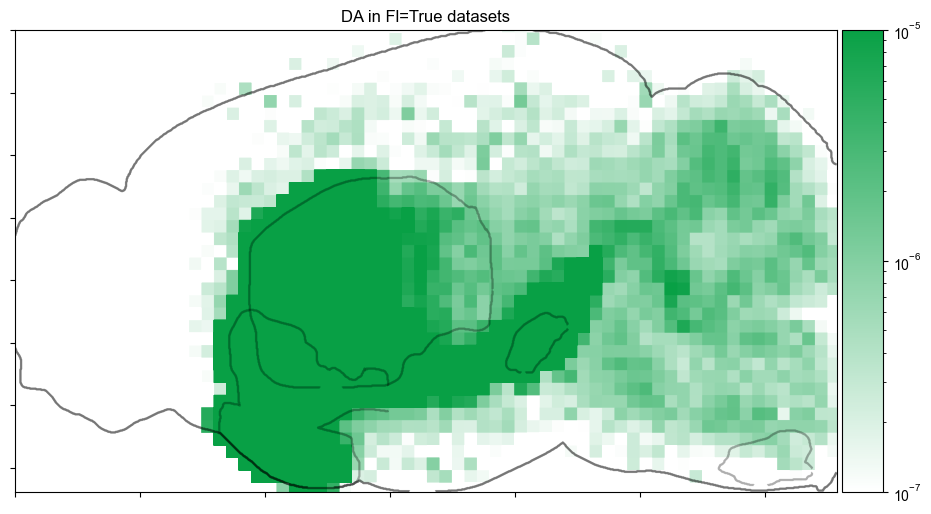

In [4]:
btp.probability_map('r', True, area_num=997, binsize=200, axis=0, sigma=None, subregions=[83, 749, 485, 493], subregion_depth=None, projcol='k', padding=0, log=True, log_min=0.0000001, vmax=0.00001)

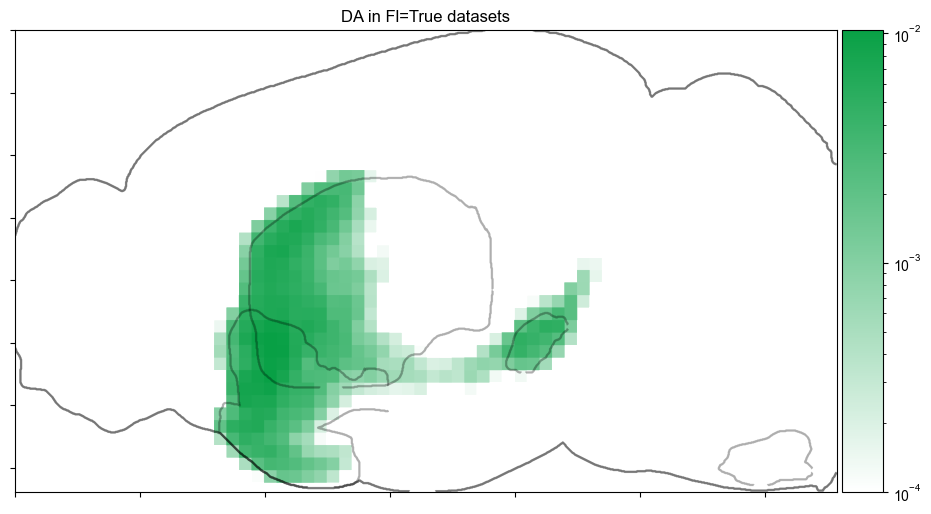

In [6]:
btp.probability_map('r', True, area_num=997, binsize=200, axis=0, sigma=None, subregions=[83, 749, 485, 493], subregion_depth=None, projcol='k', padding=0, log=True)

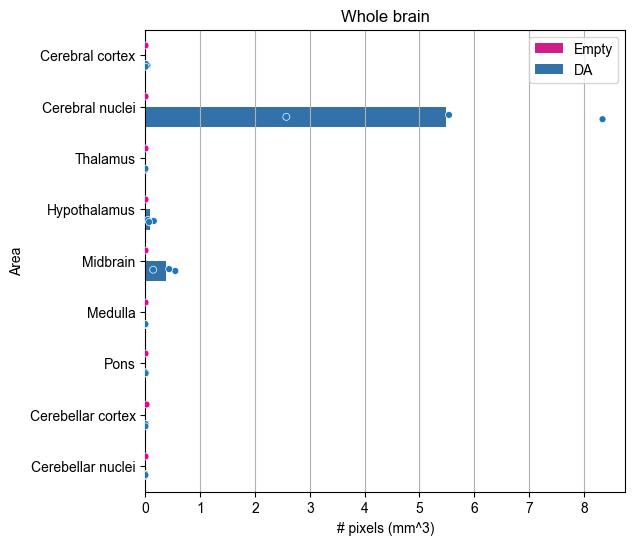

In [7]:
btp.summary_plot('r')

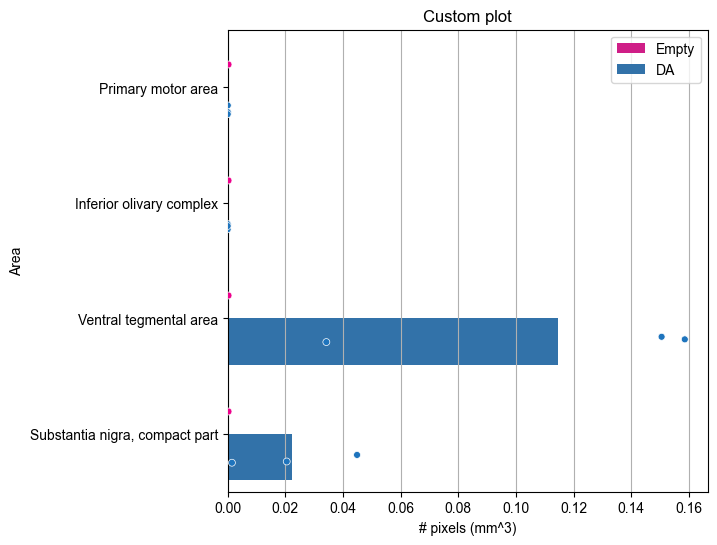

In [8]:
btp.custom_plot('r', [985, 83, 749, 374], title='Custom plot', normalisation=None, log=False, horizontal=True, ax=None)

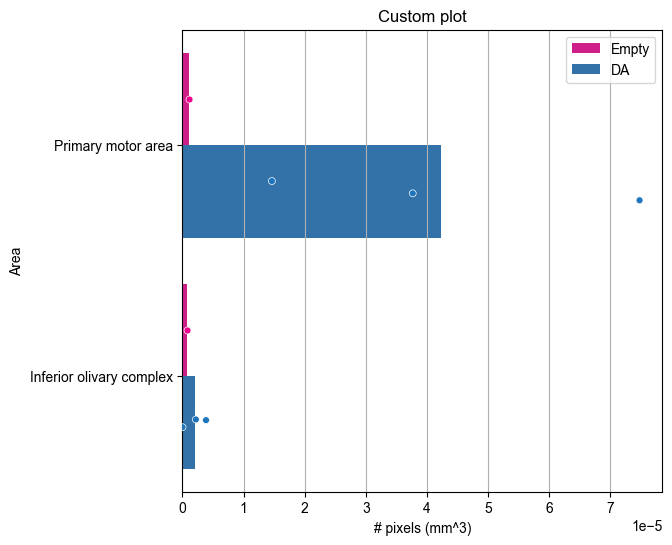

In [9]:
btp.custom_plot('r', [985, 83], title='Custom plot', normalisation=None, log=False, horizontal=True, ax=None)

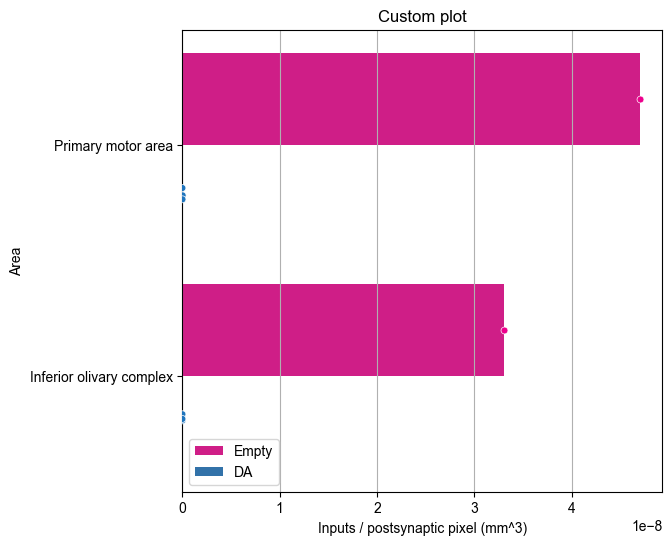

In [11]:
btp.custom_plot('r', [985, 83], title='Custom plot', normalisation='postsynaptics', log=False, horizontal=True, ax=None)

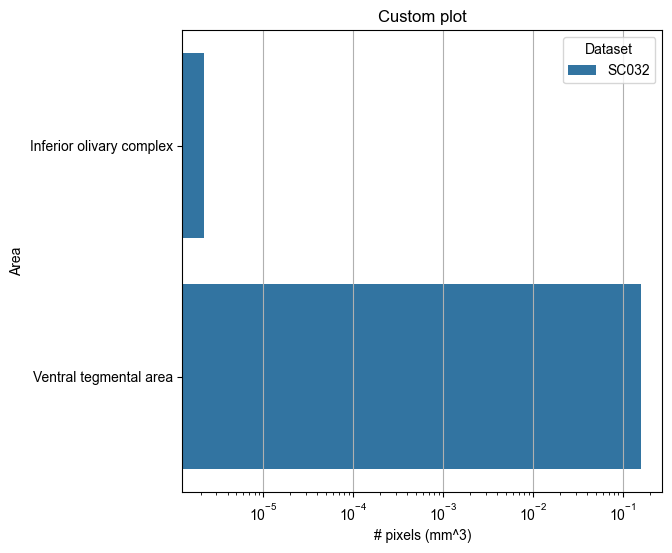

In [16]:
btp.custom_plot('r', [83, 749], title='Custom plot', normalisation=None, log=False, horizontal=True, ax=None)
plt.gca().set_xscale('log')

In [9]:
def generate_brain_overview(dataset, areas=None, vmin=None, vmax=None, axis=0, padding=0, cmap='gray', logmax=True, ax=None):
    if ax is None:
        f, ax = plt.subplots(figsize=(10,6))
        f.set_facecolor('white')
    stack = btf.open_registered_stack(dataset)

    btp.plot_projection(ax, 997, padding=padding, axis=axis)
    for i in areas:
        btp.plot_projection(ax, i, padding=padding, axis=axis)
    
    if not logmax:
        data_projection = np.sum(stack, axis=2-axis)
        title = f'#px along axis={axis}'
    else:
        data_projection = np.log(stack.max(axis=2-axis))
        title = f'log max px value along axis={axis}'
    data_projection = data_projection.astype(int)
    if axis == 0:
        data_projection = data_projection.T
    im = ax.imshow(data_projection, vmin=vmin, vmax=vmax, cmap=cmap)
    f.colorbar(im, label=title)
    plt.axis('off')

(0.0, 1319.0) (0.0, 799.0)
(0.0, 1319.0) (799.0, 0.0)
(0.0, 1319.0) (0.0, 799.0)
(0.0, 1319.0) (799.0, 0.0)
(0.0, 1319.0) (0.0, 799.0)


C:\Users\Sam\AppData\Local\Temp\ipykernel_7852\1308760885.py:15: RuntimeWarning: divide by zero encountered in log
  data_projection = np.log(stack.max(axis=2-axis))
meta NOT subset; don't know how to subset; dropped


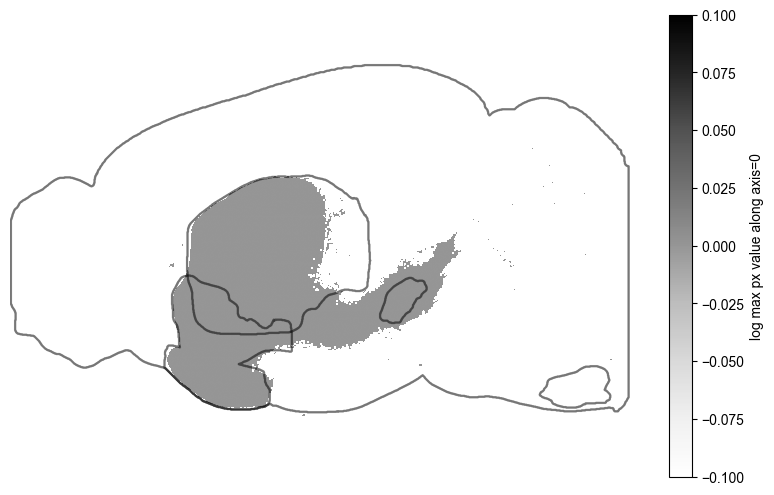

In [11]:
dataset = bt.datasets[0]
top = False
vmin = 6.5
# IO, VTA, STRd, STRv
generate_brain_overview(dataset, areas=[83, 749, 485, 493], axis=0, vmin=0, cmap='Greys', padding=None)
btf.save(f'rawProj_{dataset.name}_side={top}_min={vmin}', as_type='pdf')

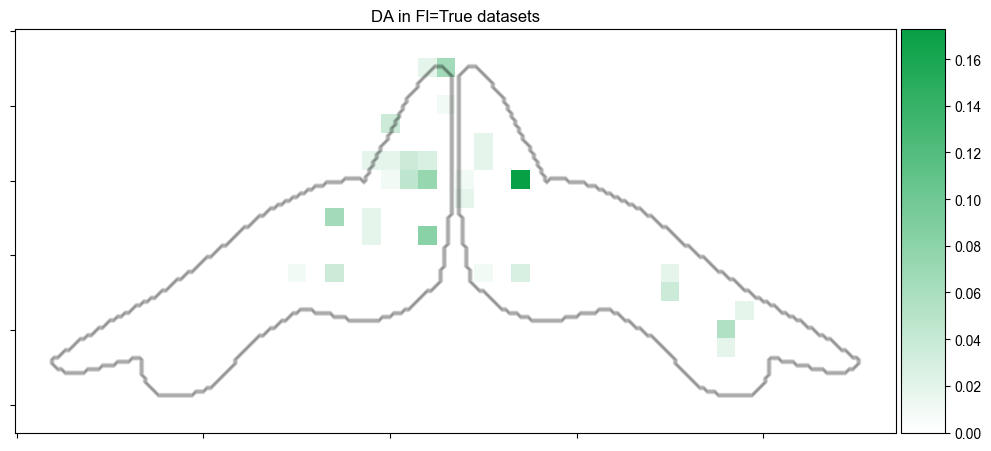

In [6]:
btp.probability_map('r', True, area_num=83, binsize=50, axis=2, sigma=None, subregions=None, subregion_depth=None, projcol='k', padding=10, vmax=None)

## Old Stuff

In [4]:
cells = []
names = []
cells_IO = []
cells_sptV = []
cells_icp = []

cells_P = []
dcn_areas = bt.children_from('CBN', depth=0)[1]
cells_DCN = []

for d in bt.datasets:
    cells += [d.num_cells()]
    names += [d.name]
    cells_IO += [d.num_cells_in('IO')]
    cells_sptV += [d.num_cells_in('sptV')]
    cells_icp += [d.num_cells_in('icp')]
    """
    cells_P += [d.num_cells_in('P')]
    
    num_cells = 0
    for area in dcn_areas:
        num_cells += d.num_cells_in(area)
    cells_DCN += [num_cells]
    """

In [5]:
cells_outside = []
for d in bt.datasets:
    cells_outside += [d.num_cells_in(0)]

In [6]:
cells_outside

[179318, 343996, 174842]

In [7]:
cells_IO, cells_sptV, cells_icp

([193, 110, 1], [237, 954, 29], [74, 26, 15])

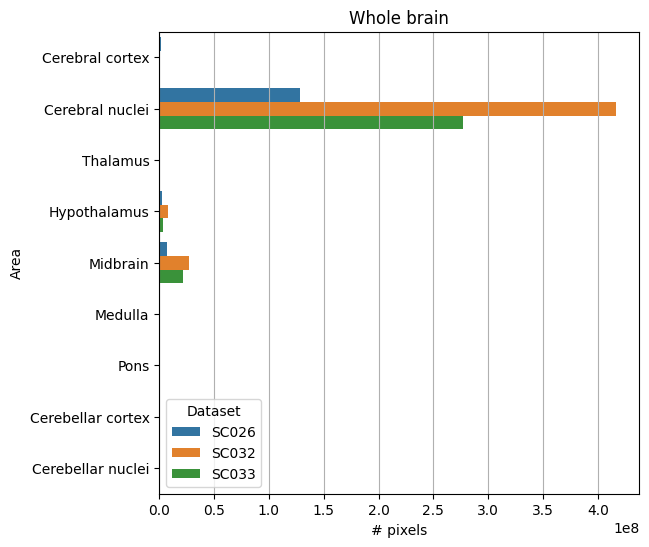

In [8]:
btp.summary_plot('r')

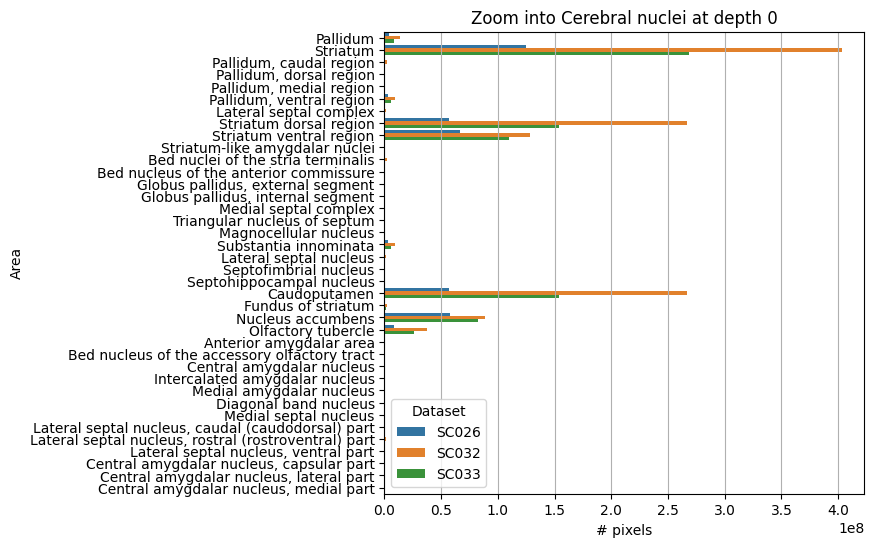

In [9]:
btp.zoom_plot('r', 'Cerebral nuclei')

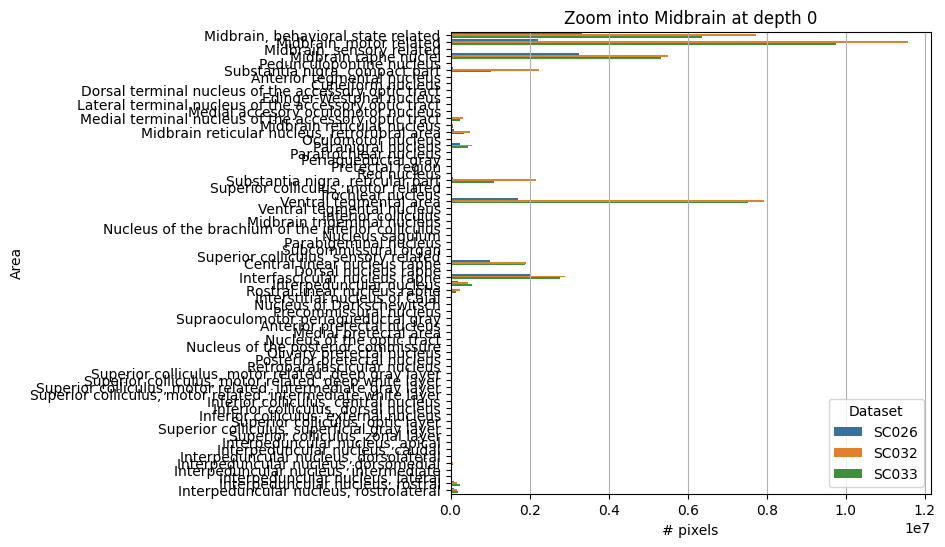

In [5]:
btp.zoom_plot('r', 'Midbrain')

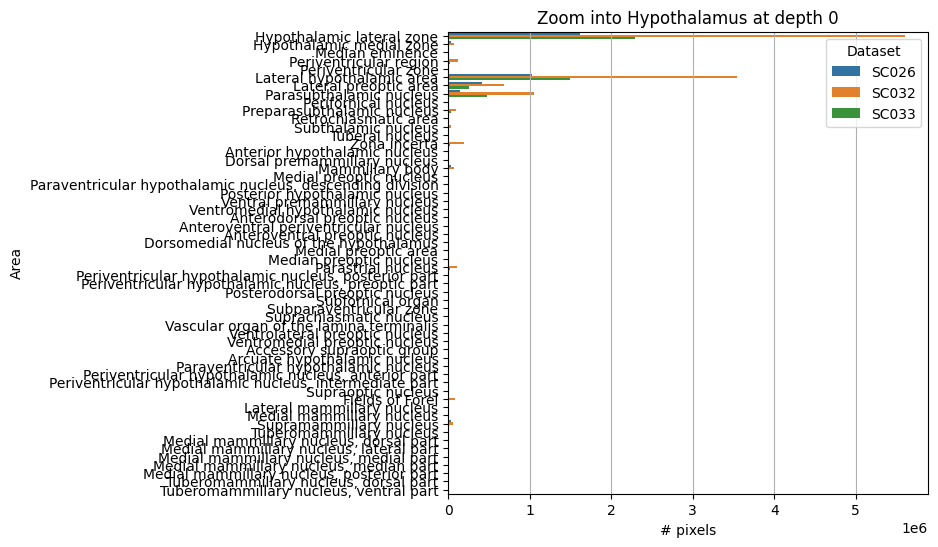

In [6]:
btp.zoom_plot('r', 'Hypothalamus')

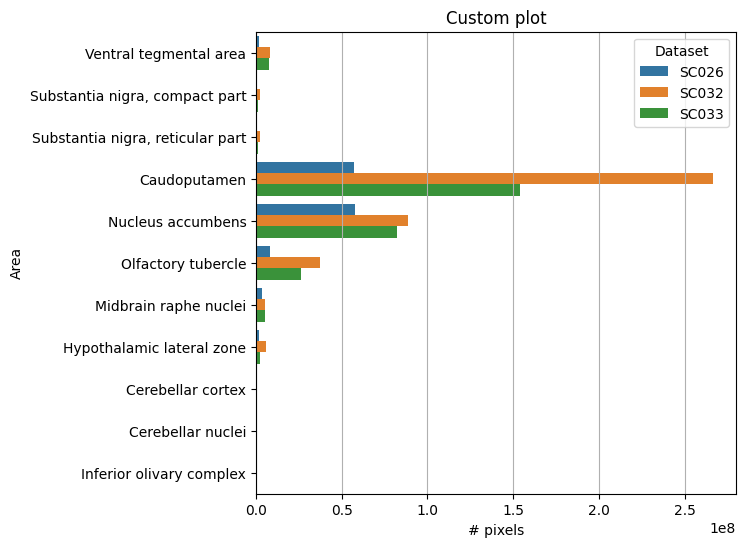

In [10]:
btp.custom_plot('r', ['VTA', 'SNc', 'SNr', 'CP', 'ACB', 'OT', 'RAmb', 'LZ', 'CBX', 'CBN', 'IO'])
btf.save('DA_bar_far', as_type='pdf')

C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

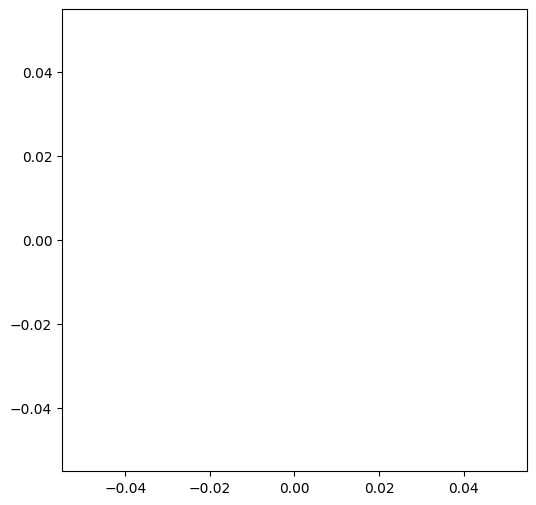

In [4]:
btp.generate_starter_cell_scatter(use_manual_count=False)

In [13]:
postsynaptics = bt._cells_in_areas_in_datasets('IO', bt.datasets, 'r', normalisation=None)[0]
presynaptics = bt._cells_in_areas_in_datasets('VTA', bt.datasets, 'r', normalisation=None)[0]

In [14]:
postsynaptics

[[193], [110], [1]]

In [19]:
def generate_starter_cell_scatter(ax=None):
    
    datasets = bt.datasets
    if ax is None:
        f, ax = plt.subplots(figsize=(6,6))
        f.set_facecolor('white')
    dataset_names = [i.name for i in datasets]
    
    assert len(postsynaptics) == len(presynaptics), 'Starter cells and total cells must be fetchable for all datasets.'

    ax.scatter(presynaptics, postsynaptics, c='r')

    #for i, name in enumerate(dataset_names):
     #   ax.annotate(name, (presynaptics[i], postsynaptics[i]), xytext=(8,3), textcoords='offset points')
    ax.set_ylabel('#px in IO')
    ax.set_xlabel('#px in VTA')
    ax.set_xlim(0, None)
    ax.set_ylim(0, 5000)

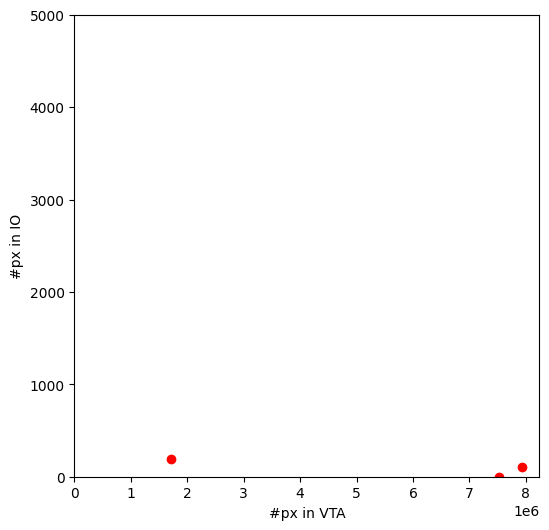

In [20]:
generate_starter_cell_scatter()
btf.save('DA_corr', as_type='pdf')

In [6]:
def area_predicate(area, threshold, normalisation, datasets):
            dataset_cells = bt._cells_in_areas_in_datasets(area, datasets, 'r', normalisation=normalisation)[0]
            mean = np.mean(np.array(dataset_cells), axis=0)[0] # calculate mean number of cells in each area
            area_has_threshold = mean > threshold

            any_child_has_threshold = False
            for child in bt.children_from(area, depth=0)[1]:
                dataset_cells = bt._cells_in_areas_in_datasets(child, datasets, 'r', normalisation=normalisation)[0]
                mean = np.mean(np.array(dataset_cells), axis=0)[0] # calculate mean number of cells in each area
                if mean > threshold:
                    any_child_has_threshold = True

            return area_has_threshold and not any_child_has_threshold

In [7]:
def fetch_groups():
    groups = btp.__get_bt_groups()
    datasets1 = [i for i in bt.datasets if i.group == groups[0]]
    datasets2 = [i for i in bt.datasets if i.group == groups[1]]
    datasets = datasets1 + datasets2
    return datasets

In [8]:
def matrix_plot(IO=False, threshold=0, normalisation='total', vbounds=(None, None), cmap='YlOrRd', figsize=(25,10)):
    
    datasets = fetch_groups()
    
    def num_in_quarter(axis, split, dataset):
        cells_along_axis = total_along_axis('r', dataset, axis, 50) # 2 is along x axis
        cells_in_side1 = np.sum(cells_along_axis[:split])
        cells_in_side2 = np.sum(cells_along_axis[split:])
        return cells_in_side1, cells_in_side2
    
    if IO:
        axis_title = 'Corrected cell count in IO'
        areas_title = 'CF Input'
        dataset_cells = np.array(list(map(lambda x: [x.postsynaptics()], datasets)))
        area_labels = ['IO']
    else:
        area_idxs, areas_title = di_outputs_antero_roi(threshold, normalisation, datasets) # choose area selection here
        area_labels = bt.get_area_info(area_idxs)[0]
        dataset_cells, axis_title = bt._cells_in_areas_in_datasets(area_labels, datasets, 'r', normalisation=normalisation)
        dataset_cells = np.array(dataset_cells)
    
    sum_side = np.mean(dataset_cells, axis=0)
    sort_order = sum_side.argsort()
    dataset_cells = dataset_cells[:, sort_order[::-1]]
    area_labels = [area_labels[i] for i in reversed(sort_order)]

    f, ax = plt.subplots(figsize=figsize)
    f.set_facecolor('white')
    aspect = 'equal'
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from matplotlib import colors
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    
    if vbounds is None:
        im = ax.matshow(dataset_cells.T, aspect=aspect, cmap=cmap, norm=colors.LogNorm())
    else:
        im = ax.matshow(dataset_cells.T, aspect=aspect, cmap=cmap, vmin=vbounds[0], vmax=vbounds[1], norm=colors.LogNorm())
    
    y_labels = [i.name for i in datasets]
    ax.set_xticks(range(len(y_labels)))
    ax.set_xticklabels(y_labels)
    ax.set_xticklabels(y_labels, rotation=90, ha='left')
    ax.set_yticks(range(len(area_labels)))
    ax.set_yticklabels(area_labels, rotation=0, ha='right')
    ax.tick_params(axis="y", bottom=True, top=False, labelbottom=True, labeltop=False)
    colours = btp._colours_from_labels(y_labels)
    [t.set_color(colours[i]) for i, t in enumerate(ax.xaxis.get_ticklabels())]
    f.colorbar(im, cax=cax, orientation='vertical')
    ax.set_ylabel(areas_title)
    ax.set_title(f'{axis_title} - area has mean {threshold} threshold but not children')
    return area_labels

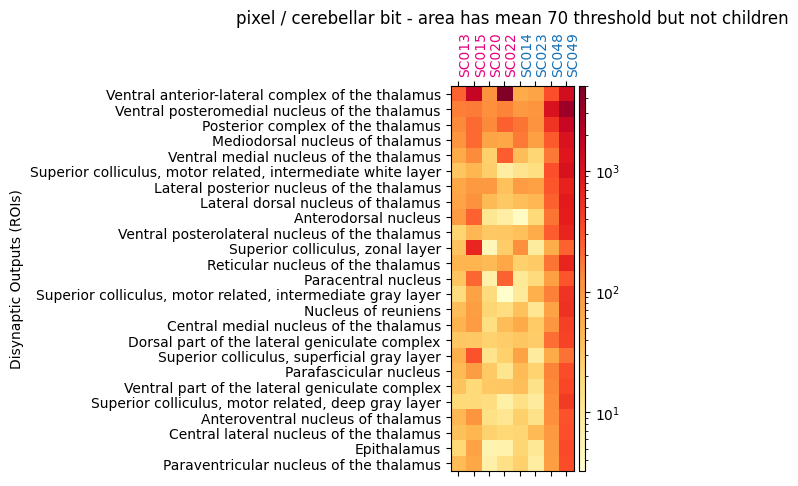

In [10]:
areas = matrix_plot(IO=False, threshold=70, normalisation='custom', figsize=(20,5))

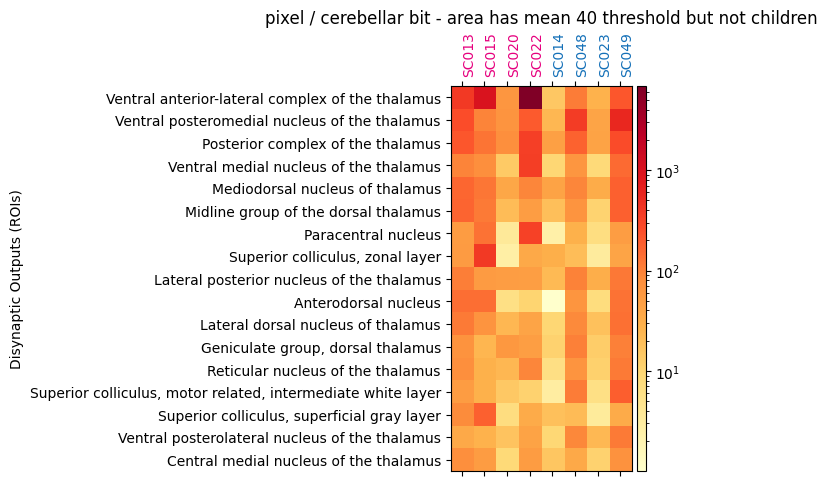

In [51]:
areas = matrix_plot(IO=False, threshold=40, normalisation='custom', figsize=(20,5))
#btf.save(f'FM_meeting_antero_input_CF', as_type='pdf')

In [11]:
bt.anova('r', areas, norm='custom')

                                               Area Dataset       Cells
0  Ventral anterior-lateral complex of the thalamus      LS  240.139172
1     Ventral posteromedial nucleus of the thalamus      LS  158.961303
2                 Posterior complex of the thalamus      LS  133.706721
3                   Mediodorsal nucleus of thalamus      LS  101.782077
4            Ventral medial nucleus of the thalamus      LS   61.405295
                                               Area Dataset  Cells
0  Ventral anterior-lateral complex of the thalamus      LS  163.0
1     Ventral posteromedial nucleus of the thalamus      LS  148.0
2                 Posterior complex of the thalamus      LS  142.0
3                   Mediodorsal nucleus of thalamus      LS  131.0
4            Ventral medial nucleus of the thalamus      LS  103.0


sum_sq 
 df 
 F 
 PR(>F) 
 
 
 
 
 C(Area) 
 153792.5 
 24.0 
 2.392492 
 0.000644 
 
 
 C(Dataset) 
 46818.0 
 1.0 
 17.479917 
 0.000046 
 
 
 Residual 
 466039.5 
 174.0 
 NaN 
 NaN

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
def anova_parametric(channel, areas, norm=None):
    df = bt.get_stats_df(channel, areas, normalisation=norm)
    print(df.head())
    df['Cells'] = stats.rankdata(df['Cells'])
    model = ols('Cells ~ C(Area) * C(Dataset)', data=df).fit()
    return sm.stats.anova_lm(model, typ=2)

In [13]:
anova_parametric('r', areas, norm='custom')

                                               Area Dataset       Cells
0  Ventral anterior-lateral complex of the thalamus      LS  240.139172
1     Ventral posteromedial nucleus of the thalamus      LS  158.961303
2                 Posterior complex of the thalamus      LS  133.706721
3                   Mediodorsal nucleus of thalamus      LS  101.782077
4            Ventral medial nucleus of the thalamus      LS   61.405295


sum_sq 
 df 
 F 
 PR(>F) 
 
 
 
 
 C(Area) 
 153792.5 
 24.0 
 2.185971 
 0.002411 
 
 
 C(Dataset) 
 46818.0 
 1.0 
 15.971045 
 0.000101 
 
 
 C(Area):C(Dataset) 
 26325.0 
 24.0 
 0.374177 
 0.996750 
 
 
 Residual 
 439714.5 
 150.0 
 NaN 
 NaN

In [70]:
bt.mwu('r', 'VAL', norm='custom')

MannwhitneyuResult(statistic=14.0, pvalue=0.11428571428571428)

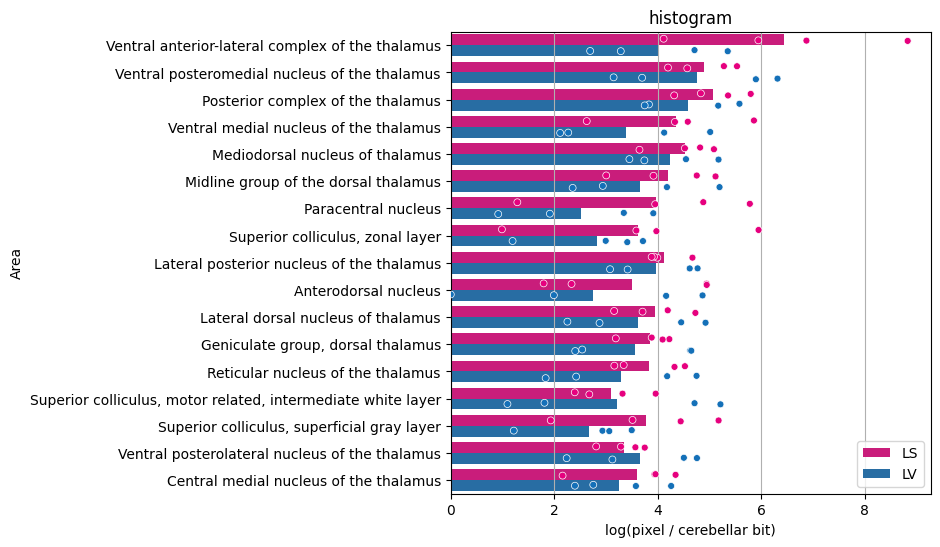

In [69]:
#children, title = di_outputs_antero_roi(threshold=30, normalisation='custom', datasets=fetch_groups())
btp.custom_plot('r', areas, normalisation='custom', title='histogram', log=True)
#btf.save(f'FM_meeting_antero_hist_input_CF', as_type='pdf')

Normalisation set to None, defaulting to pixel count.
Normalisation set to None, defaulting to pixel count.


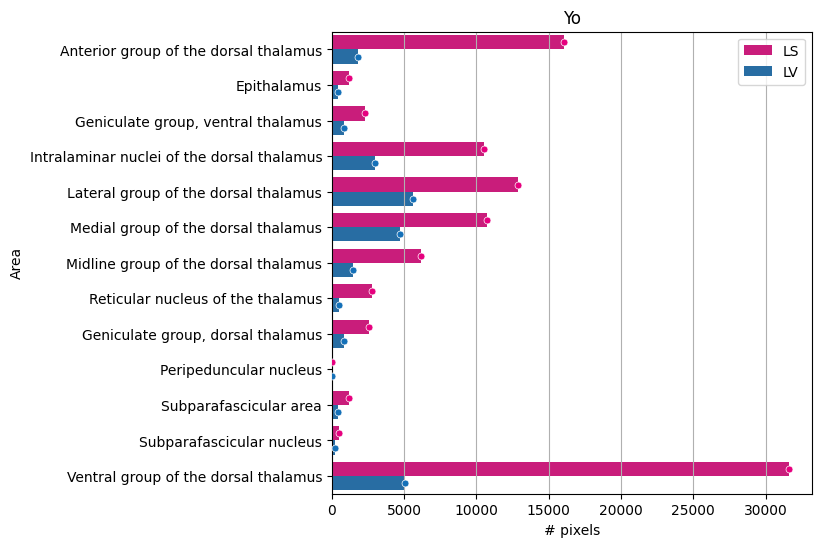

In [4]:
children = bt.children_from('TH', depth=2)[1]
btp.custom_plot('r', children, title='Yo')

Normalisation set to None, defaulting to pixel count.
Normalisation set to None, defaulting to pixel count.
Normalisation set to None, defaulting to pixel count.
Normalisation set to None, defaulting to pixel count.
Normalisation set to None, defaulting to pixel count.
Normalisation set to None, defaulting to pixel count.
Normalisation set to None, defaulting to pixel count.
Normalisation set to None, defaulting to pixel count.
(8, 8)
(8,)
[0 5 7]


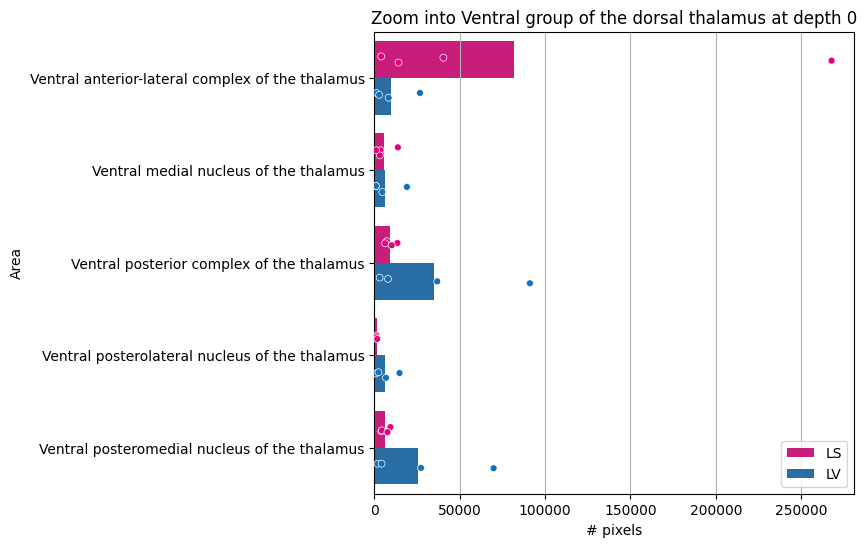

In [4]:
btp.zoom_plot('r', 'Ventral group of the dorsal thalamus', depth=0, threshold=3_000)

(8, 66)
(66,)
[]


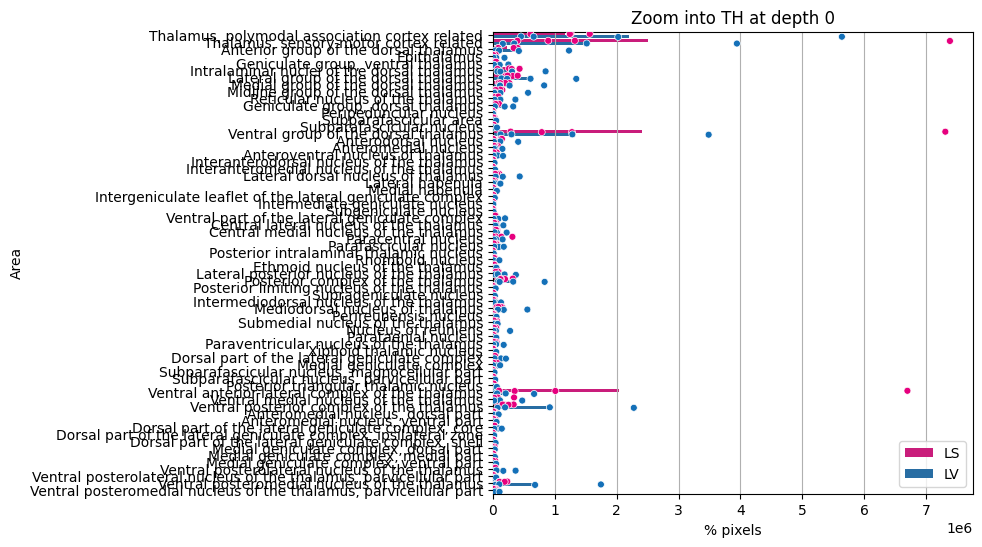

In [10]:
btp.zoom_plot('r', 'TH', depth=0, threshold=0.5, normalisation='total')

In [ ]:
btp.probability_map('r', area_num=528, subregions=None, binsize=100, axis=2, sigma=1, projcol='k', vlim=None)
btf.save(f'Paper_antero_pmap_CBX_coronal', as_type='pdf')

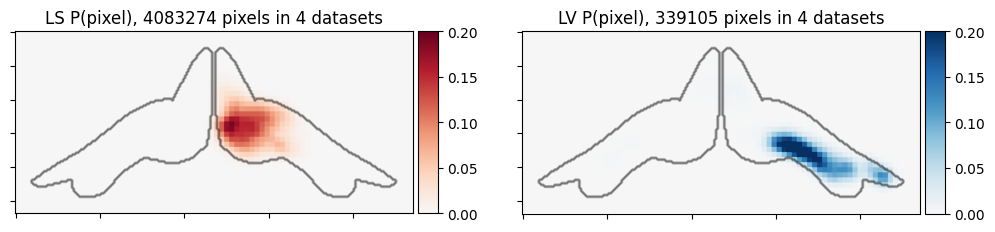

In [15]:
btp.probability_map('r', area_num=83, subregions=None, binsize=30, axis=2, sigma=1, projcol='k', vlim=0.2)
btf.save(f'Paper_antero_pmap_IO_coronal', as_type='pdf')

In [ ]:
btp.probability_map('r', area_num=931, subregions=None, binsize=50, axis=2, sigma=1, projcol='k', vlim=0.08)

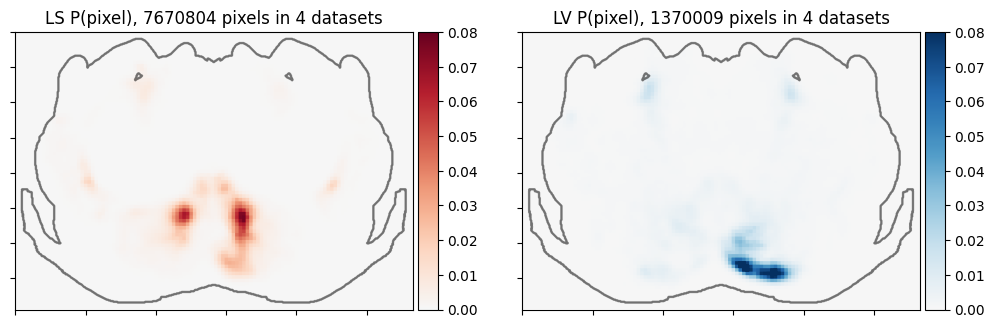

In [14]:
btp.probability_map('r', area_num=771, subregions=None, binsize=50, axis=2, sigma=1, projcol='k', vlim=0.08)
btf.save(f'Paper_antero_pmap_P_coronal', as_type='pdf')

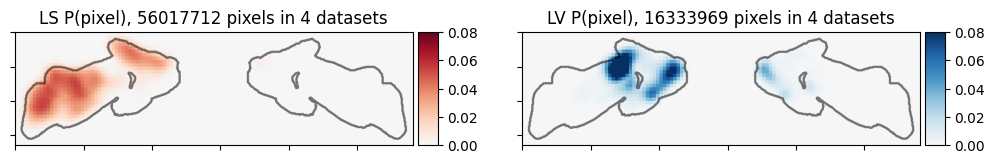

In [17]:
btp.probability_map('r', area_num=519, subregions=None, binsize=50, axis=2, sigma=1, projcol='k', vlim=0.08)
btf.save(f'Paper_antero_pmap_CBN_coronal', as_type='pdf')

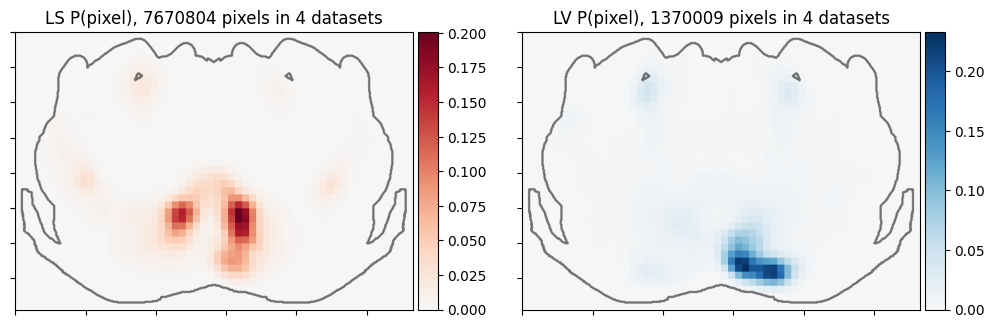

In [8]:
btp.probability_map('r', area_num=771, subregions=None, binsize=100, axis=2, sigma=1, projcol='k', vlim=None)

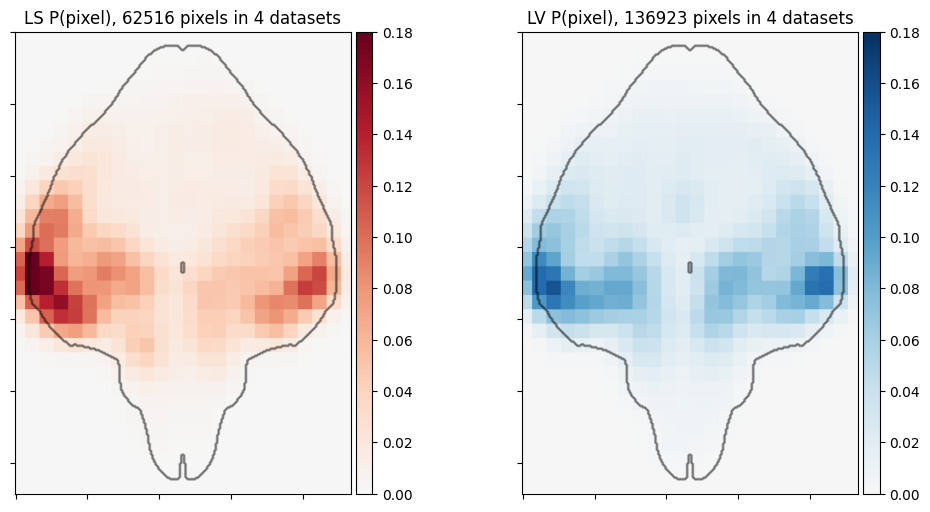

In [75]:
btp.probability_map('r', area_num=795, subregions=None, binsize=100, axis=2, sigma=1, projcol='k', vlim=0.18)
btf.save(f'FM_meeting_antero_pmap_PAG_coronal', as_type='pdf')

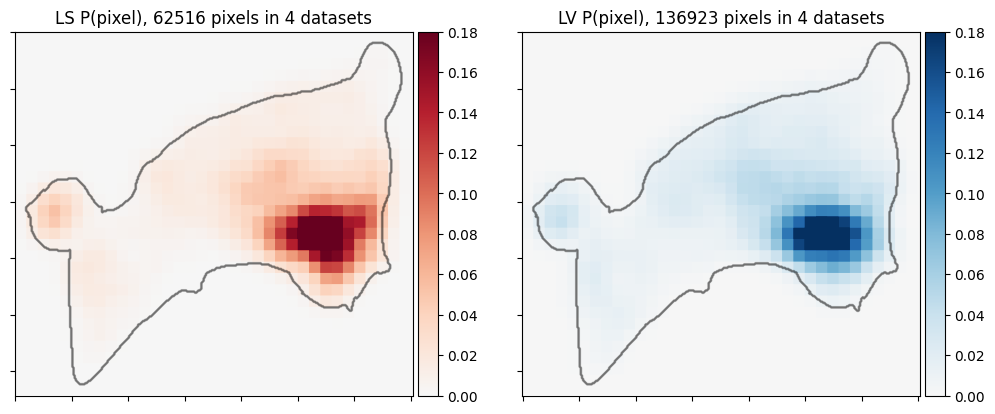

In [76]:
btp.probability_map('r', area_num=795, subregions=None, binsize=100, axis=0, sigma=1, projcol='k', vlim=0.18)
btf.save(f'FM_meeting_antero_pmap_PAG_sagittal', as_type='pdf')

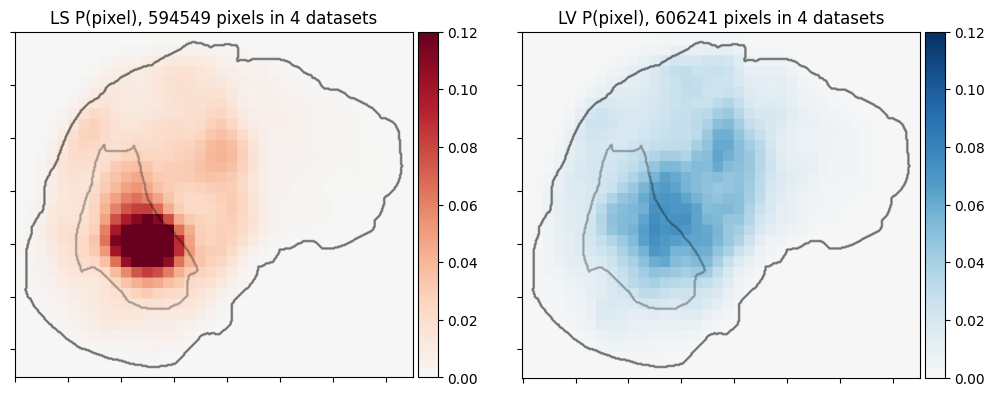

In [77]:
btp.probability_map('r', area_num=549, subregions=[629], binsize=100, axis=0, sigma=1, projcol='k', vlim=0.12)
btf.save(f'FM_meeting_antero_pmap_TH_sagittal', as_type='pdf')

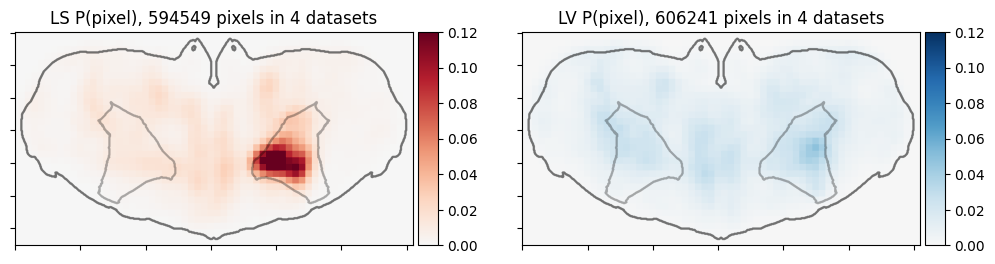

In [78]:
btp.probability_map('r', area_num=549, subregions=[629], binsize=100, axis=2, sigma=1, projcol='k', vlim=0.12)
btf.save(f'FM_meeting_antero_pmap_TH_coronal', as_type='pdf')

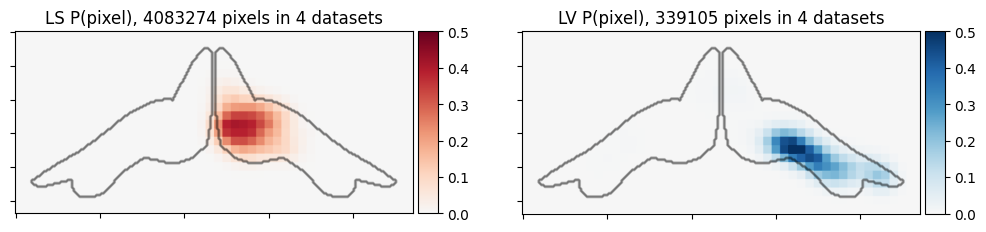

In [86]:
btp.probability_map('r', area_num=83, subregions=None, binsize=50, axis=2, sigma=1, projcol='k', vlim=0.5)
btf.save(f'FM_meeting_antero_pmap_IO_coronal', as_type='pdf')

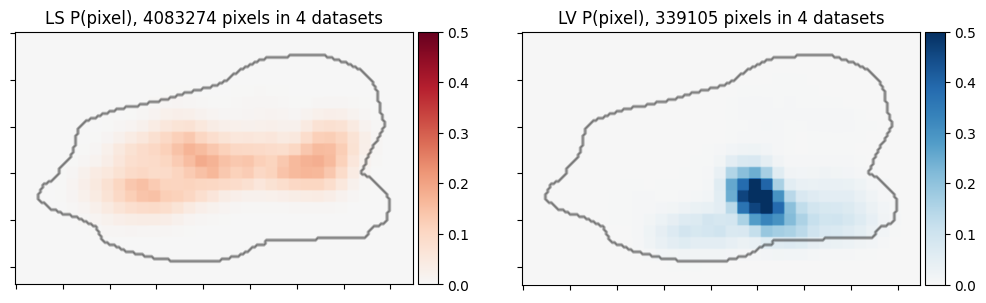

In [87]:
btp.probability_map('r', area_num=83, subregions=None, binsize=50, axis=0, sigma=1, projcol='k', vlim=0.5)
btf.save(f'FM_meeting_antero_pmap_IO_sagittal', as_type='pdf')

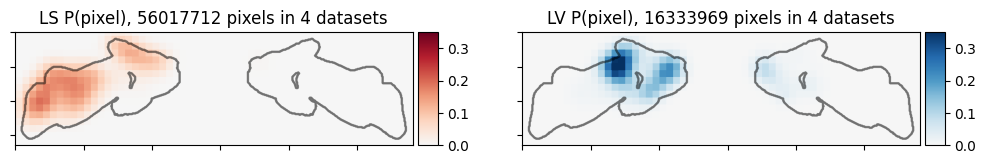

In [88]:
btp.probability_map('r', area_num=519, binsize=100, axis=2, sigma=1, projcol='k', vlim=0.35)
btf.save(f'FM_meeting_antero_pmap_DCN_coronal', as_type='pdf')

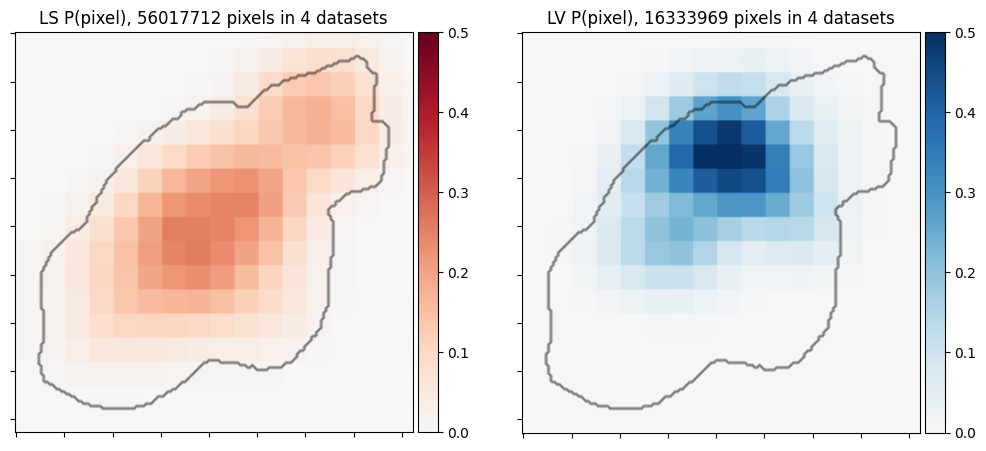

In [89]:
btp.probability_map('r', area_num=519, binsize=100, axis=0, sigma=1, projcol='k', vlim=0.5)
btf.save(f'FM_meeting_antero_pmap_DCN_sagittal', as_type='pdf')

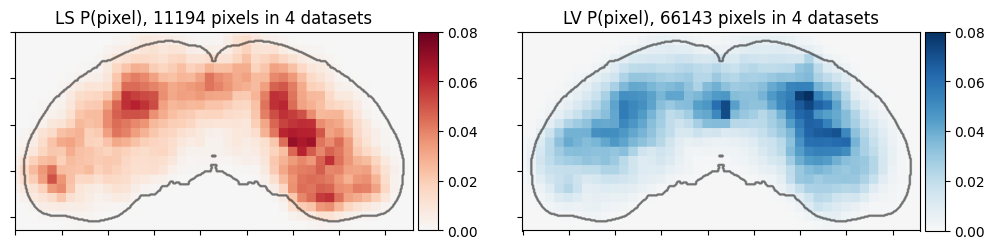

In [90]:
btp.probability_map('r', area_num=294, binsize=100, axis=2, sigma=1, projcol='k', vlim=0.08)
btf.save(f'FM_meeting_antero_pmap_SCm_coronal', as_type='pdf')

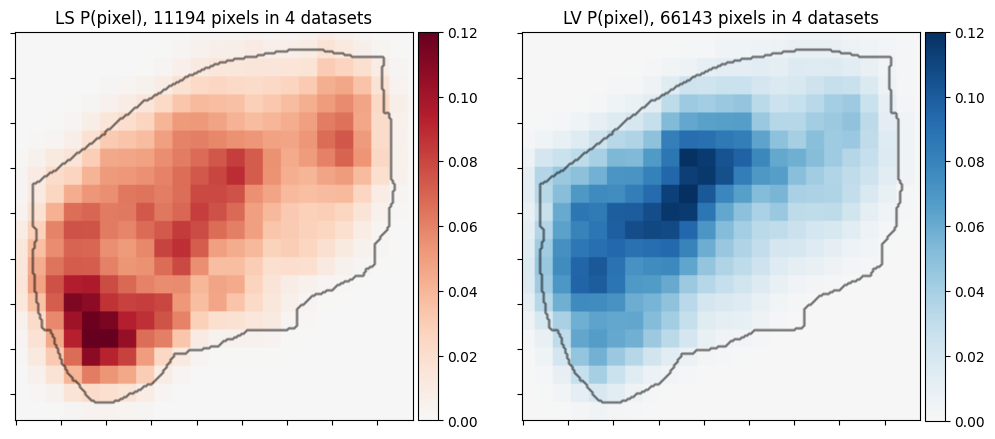

In [91]:
btp.probability_map('r', area_num=294, binsize=100, axis=0, sigma=1, projcol='k', vlim=0.12)
btf.save(f'FM_meeting_antero_pmap_SCm_sagittal', as_type='pdf')

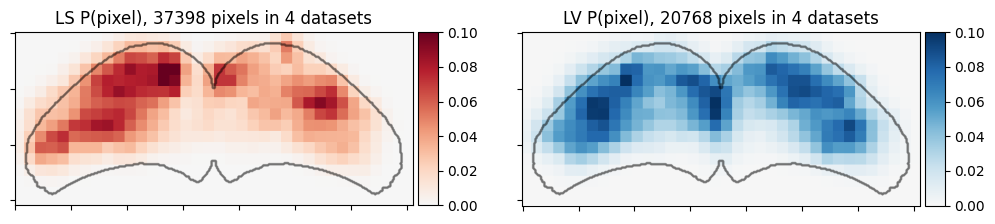

In [92]:
btp.probability_map('r', area_num=302, binsize=100, axis=2, sigma=1, projcol='k', vlim=0.10)
btf.save(f'FM_meeting_antero_pmap_SCs_coronal', as_type='pdf')

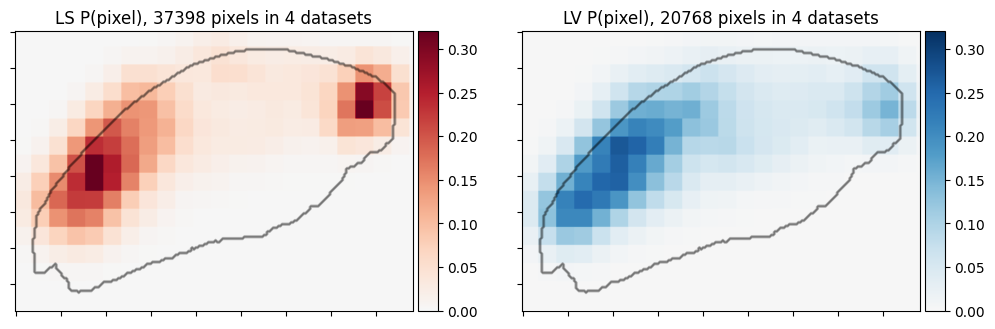

In [93]:
btp.probability_map('r', area_num=302, binsize=100, axis=0, sigma=1, projcol='k', vlim=0.32)
btf.save(f'FM_meeting_antero_pmap_SCm_sagittal', as_type='pdf')

In [ ]:
btp.probability_map('r', area_num=315, binsize=100, axis=1, sigma=1, projcol='k', vlim=0.05)

In [ ]:
btp.probability_map('r', area_num=771, binsize=100, axis=2, sigma=1, projcol='k', vlim=None)

In [ ]:
btp.probability_map('r', area_num=214, binsize=100, axis=2, sigma=1, projcol='k', vlim=None)

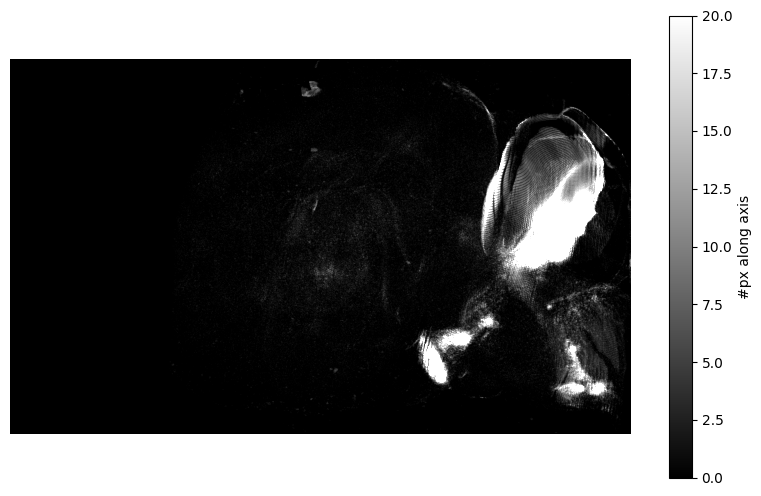

In [4]:
dataset = bt.datasets[0]
btp.generate_brain_overview(dataset, top_down=False, vmin=None, vmax=20)
#btf.save(f'sagittal_proj_antero_{dataset.name}', as_type='png')

[[0.16597964259674475, 0.03974508242134273, 0.08807151008871825, 0.014965759591219308, 0.10517367906836379, 1.474421454285463, 0.19499002436015084, 87.87055082758812, 2.2448784638458767], [0.07138418288805347, 0.019071406422487506, 0.04099168047385238, 0.00616055498463677, 0.031413535278920754, 0.6025027625487183, 0.9429877156488307, 80.99052572852857, 6.275008888361907], [0.18803037341268564, 0.010762968720536087, 0.018715614896034072, 0.004297534344860574, 0.13321547001982273, 1.0895169413182355, 0.1892232335450519, 89.70766133000961, 1.3408115827381144], [0.6044626065762755, 0.011819727482195801, 0.055332516887267626, 0.007931797400210197, 0.07806575074139492, 1.284744837642665, 0.45771674157499465, 82.62538335620658, 5.833688138674554], [0.10433941419714882, 0.035884782451753486, 0.021786325455857077, 0.005252675652978599, 0.017492792899387936, 0.4121423162013251, 1.4691926786861633, 81.22219618875552, 5.612461060906812]]
92.2% , 89.0% , 92.7% , 91.0% , 88.9% cells are within brain

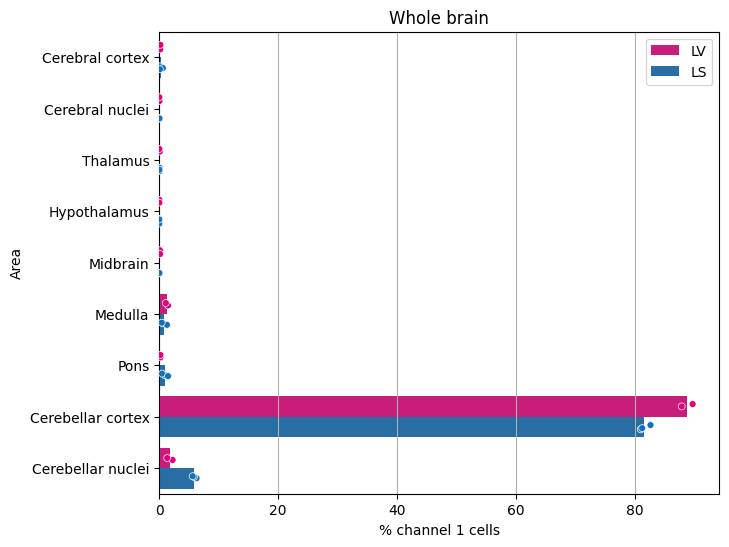

In [4]:
btp.generate_summary_plot()

In [ ]:
btp.generate_zoom_plot('TH', threshold=1)

In [ ]:
btp.probability_map(area_num=83, binsize=50, axis=2, sigma=1, projcol='k', vlim=None)

x:452 688 y:647 755 z:1118 1288


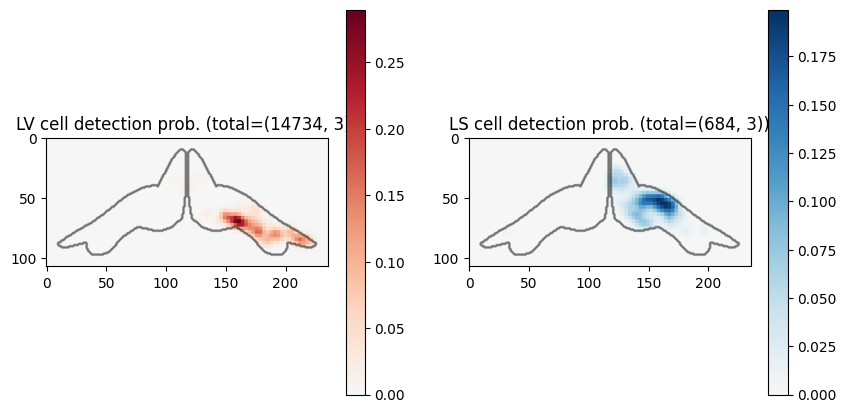

In [30]:
btp.probability_map(area_num=83, binsize=30, axis=2, sigma=1, projcol='k', vlim=None)

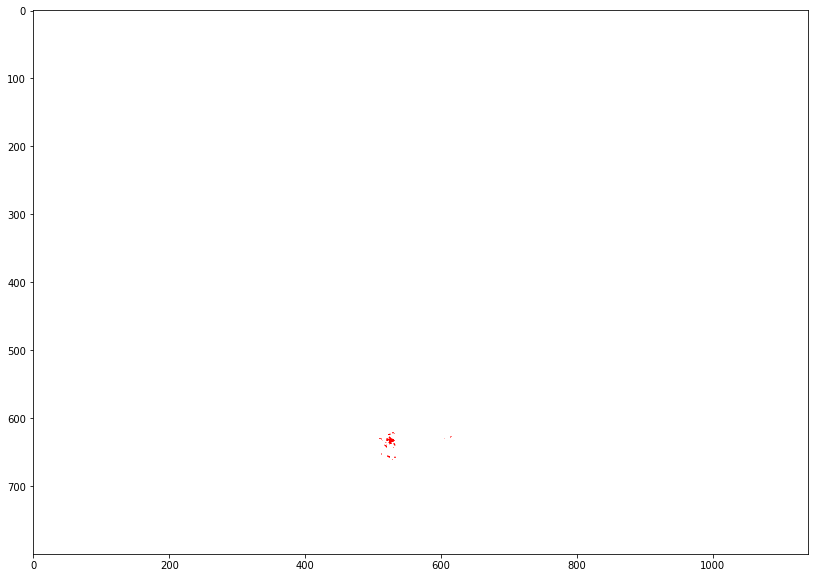

In [49]:
f, ax = plt.subplots(figsize=(14,10))
im = bt.datasets[0].ch2
color_list = [(1,0,0,c) for c in bt.np.linspace(0,1,100)]
cmapred = bt.colors.LinearSegmentedColormap.from_list('mycmap', color_list, N=5)
ax.imshow(im[895,:,:], cmap=cmapred)

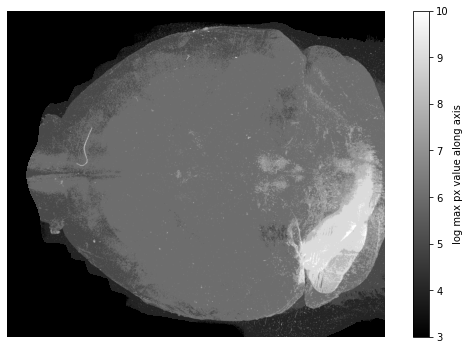

In [10]:
dataset = bt.datasets[0]
btp.generate_brain_overview(dataset, vmin=3, top_down=True)
btf.save(f'{dataset.name}_horizontal_outline', as_type='png')

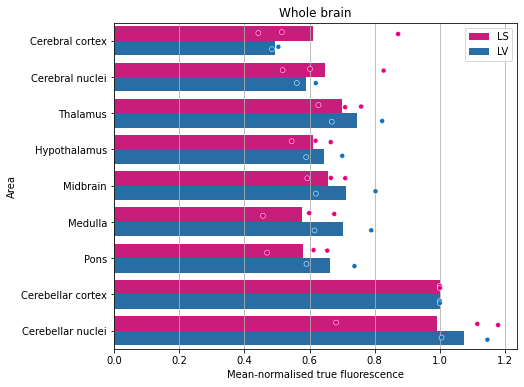

In [4]:
btp.generate_summary_plot()
#btf.save(f'fluorescence_plot', as_type='png')

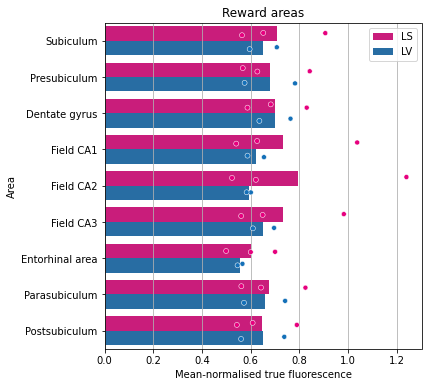

In [5]:
reward = ['SUB','PRE','DG','CA1','CA2','CA3','ENT','PAR','POST']
btp.generate_custom_plot(reward, title='Reward areas', normalisation='ch1')

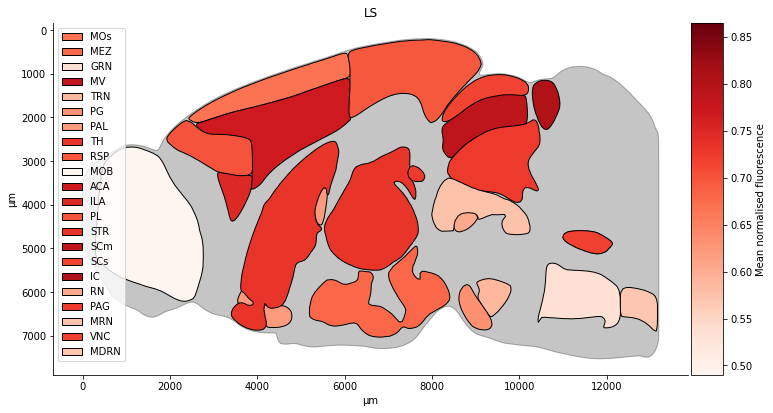

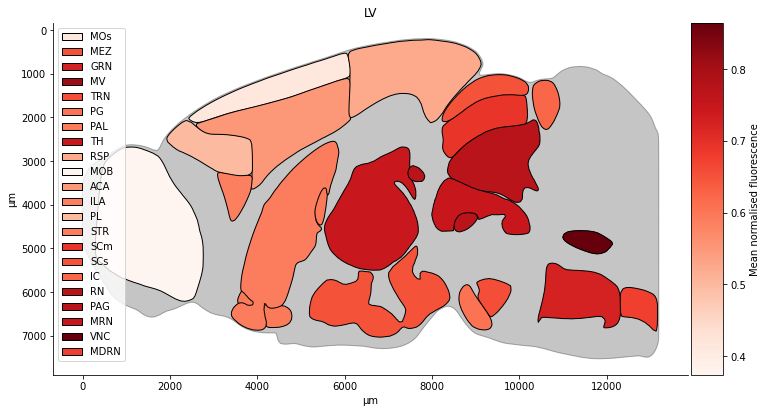

In [5]:
areas_6100 = ['MOs','MEZ','GRN','MV','TRN','PG','PAL','TH','RSP','MOB','ACA','ILA','PL','STR','SCm','SCs','IC','RN','PAG','MRN','VNC','GRN','MDRN']
btp.generate_heatmap_comparison(areas_6100, orientation='sagittal', position=6100, legend=True)

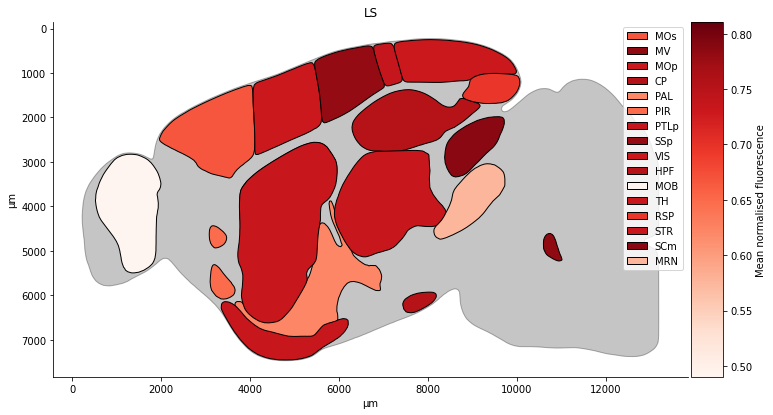

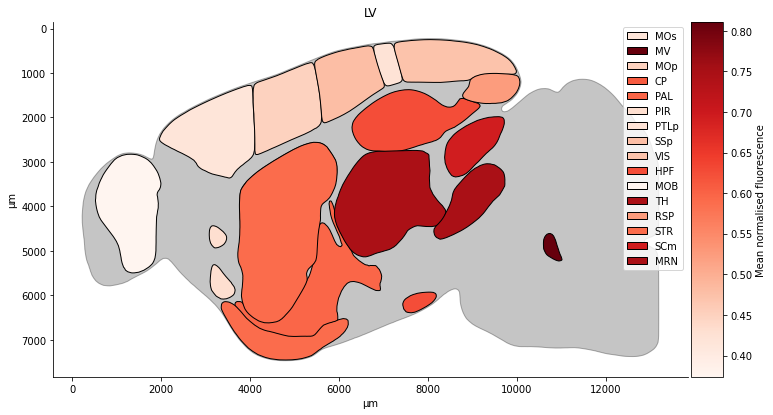

In [7]:
areas_7300 = ['MOs','MV','MOp','CP','PAL','PIR','PTLp','SSp','VIS','HPF','MOB','TH','RSP','STR','SCm','MRN']
btp.generate_heatmap_comparison(areas_7300, orientation='sagittal', position=7300)

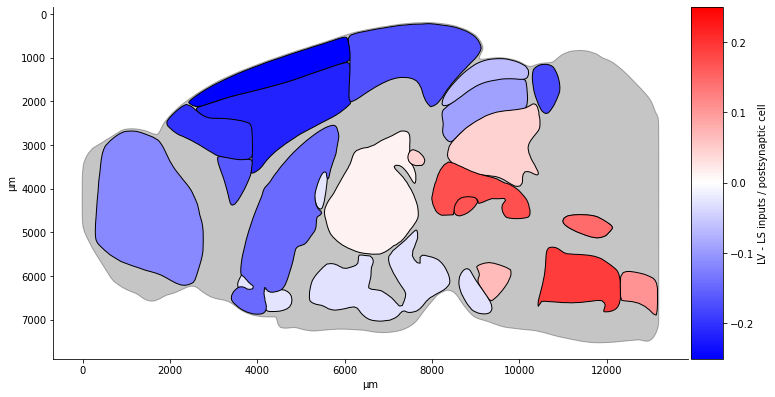

In [9]:
areas_6100 = ['MOs','MEZ','GRN','MV','TRN','PG','PAL','TH','RSP','MOB','ACA','ILA','PL','STR','SCm','SCs','IC','RN','PAG','MRN','VNC','GRN','MDRN']
btp.generate_heatmap_difference(areas_6100, orientation='sagittal', position=6100, legend=False)

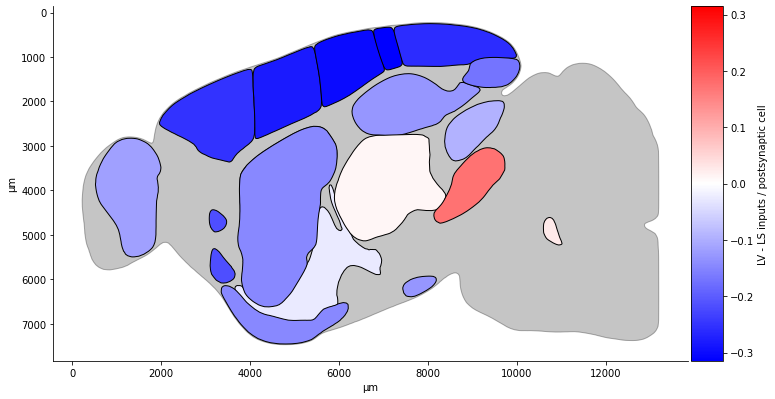

In [10]:
areas_7300 = ['MOs','MV','MOp','CP','PAL','PIR','PTLp','SSp','VIS','HPF','MOB','TH','RSP','STR','SCm','MRN']
btp.generate_heatmap_difference(areas_7300, orientation='sagittal', position=7300, legend=False)

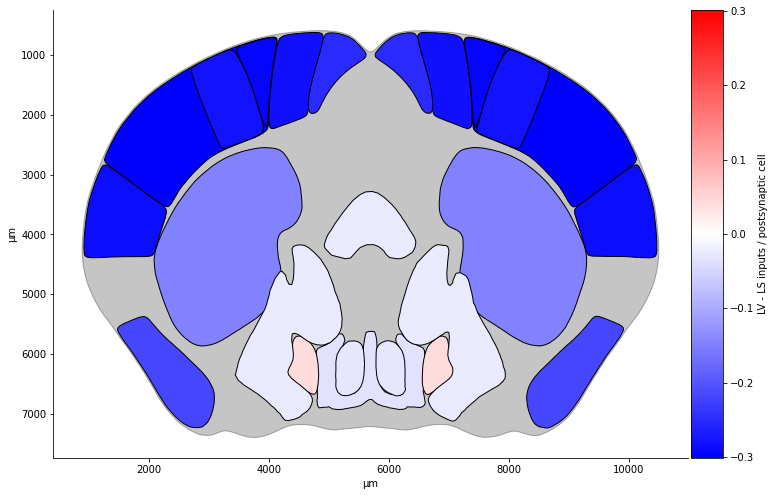

In [11]:
ctx = ['MOp','MOs','SSp','SSp-ll','SSp-ul','SSs','CP','PVZ','PVR','MEZ','LZ','PIR','PAL']
btp.generate_heatmap_difference(ctx, orientation='frontal', position=5500, legend=False, limit=None)

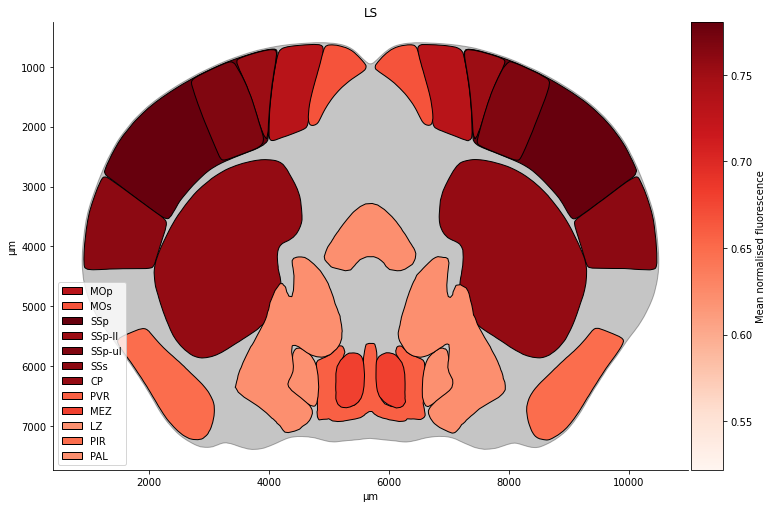

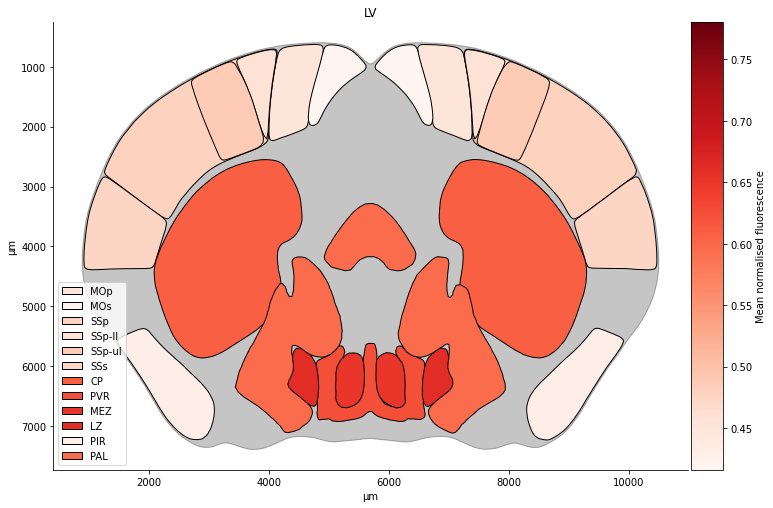

In [8]:
ctx = ['MOp','MOs','SSp','SSp-ll','SSp-ul','SSs','CP','PVZ','PVR','MEZ','LZ','PIR','PAL'] # ,'MO','SS'
btp.generate_heatmap_comparison(ctx, orientation='frontal', position=5500)

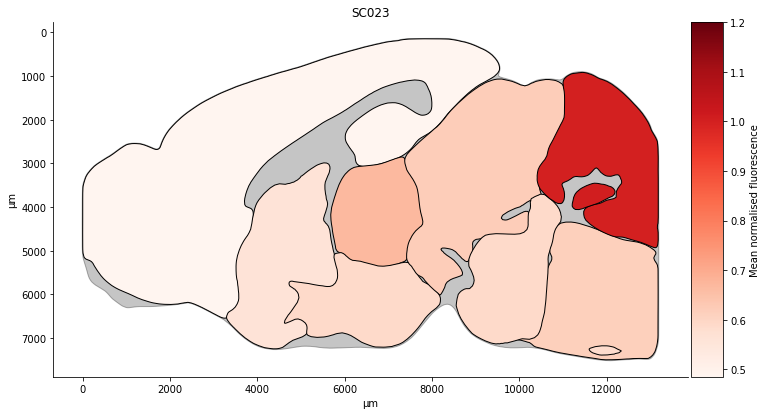

In [6]:
btp.generate_heatmap(bt.datasets[-1], position=6500, vmax=1.2, legend=False)
#btf.save(f'{dataset.name}_horizontal', as_type='png')

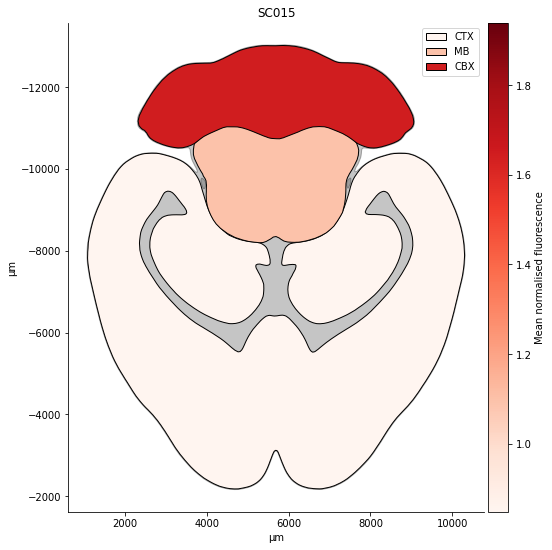

In [16]:
btp.generate_heatmap(bt.datasets[2], position=2000, orientation='horizontal')
#btf.save('SC023_overview_heatmap', as_type='pdf')

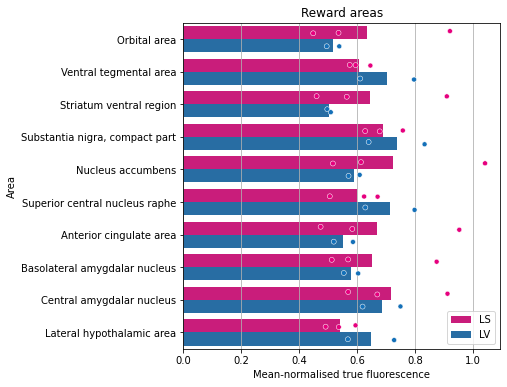

In [6]:
reward = ['ORB','VTA','STRv','SNc','ACB','CS','ACA','BLA','CEA','LHA']
btp.generate_custom_plot(reward, title='Reward areas', normalisation='ch1')
#btf.save(f'fluorescence_reward_{title}', as_type='png')

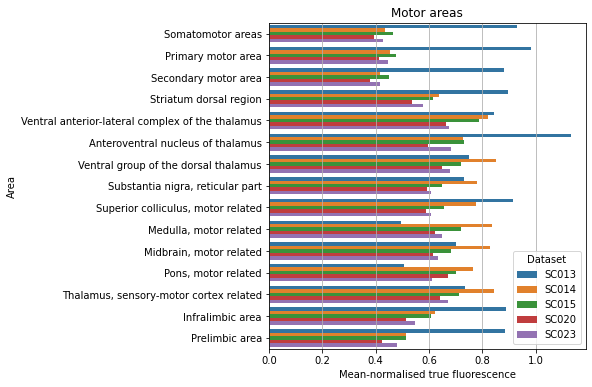

In [10]:
motor = ['MO','MOp','MOs','STRd','VAL','AV','VENT','SNr','SCm','MY-mot','MBmot','P-mot','DORsm','ILA','PL']
btp.generate_custom_plot(motor, title='Motor areas', normalisation='ch1')

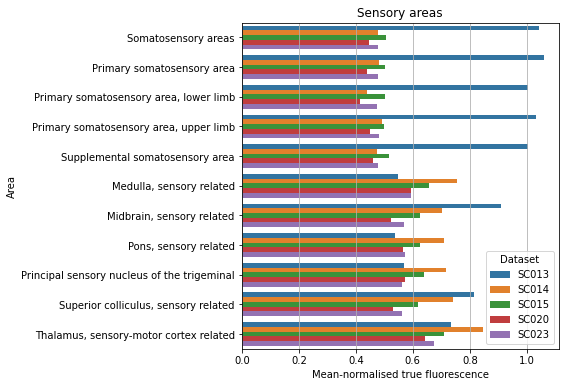

In [11]:
sensory = ['SS','SSp','SSp-ll','SSp-ul','SSs','MY-sen','MBsen','P-sen','PSV','SCs','DORsm']
btp.generate_custom_plot(sensory, title='Sensory areas', normalisation='ch1')

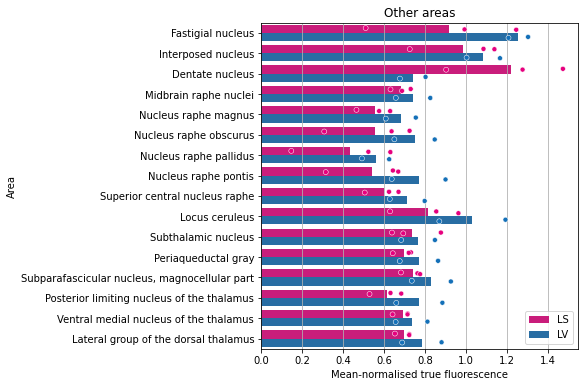

In [9]:
other = ['FN','IP','DN','RAmb','RM','RO','RPA','RPO','CS','LC','STN','PAG','SPFm','POL','VM','LAT']
btp.generate_custom_plot(other, title='Other areas', normalisation='ch1')

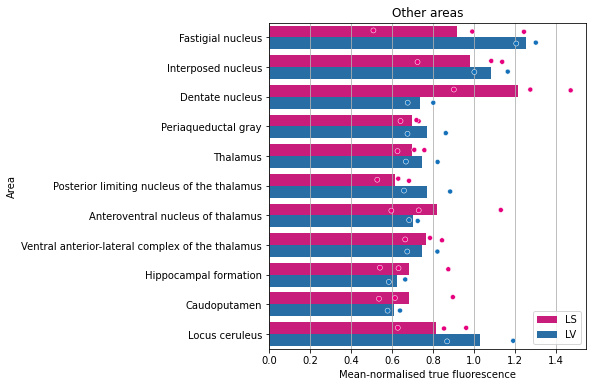

In [5]:
plot = ['FN','IP','DN','PAG','TH','POL','AV','VAL','HPF','CP','LC']
btp.generate_custom_plot(plot, title='Other areas', normalisation='ch1')
btf.save(f'fig8_{title}', as_type='png')

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
def anova(areas, norm='postsynaptics'):
    df = btp.get_stats_df(areas, normalisation=norm)
    print(df.head())
    df['Cells'] = stats.rankdata(df['Cells'])
    print(df.head())
    model = ols('Cells ~ C(Area) + C(Dataset)', data=df).fit()
    return sm.stats.anova_lm(model, typ=2)
def mwu(area, norm='postsynaptics'):
    df = btp.get_stats_df([area], normalisation=norm)
    LS_group = df.loc[df['Dataset']=='LS', 'Cells'].tolist()
    LV_group = df.loc[df['Dataset']=='LV', 'Cells'].tolist()
    return stats.mannwhitneyu(LS_group, LV_group)

In [5]:
anova(['FN','IP','DN'])

  Area Dataset     Cells
0   FN      LS  0.509843
1   IP      LS  0.725070
2   DN      LS  0.902459
3   FN      LV  1.302321
4   IP      LV  1.165348
  Area Dataset  Cells
0   FN      LS    1.0
1   IP      LS    3.0
2   DN      LS    5.0
3   FN      LV   14.0
4   IP      LV   10.0


sum_sq 
 df 
 F 
 PR(>F) 
 
 
 
 
 C(Area) 
 5.200000e+00 
 2.0 
 1.040757e-01 
 0.902034 
 
 
 C(Dataset) 
 5.750796e-29 
 1.0 
 2.301993e-30 
 1.000000 
 
 
 Residual 
 2.748000e+02 
 11.0 
 NaN 
 NaN

In [6]:
mwu('DN')

MannwhitneyuResult(statistic=0.0, pvalue=0.07445733658938286)

KeyboardInterrupt: 

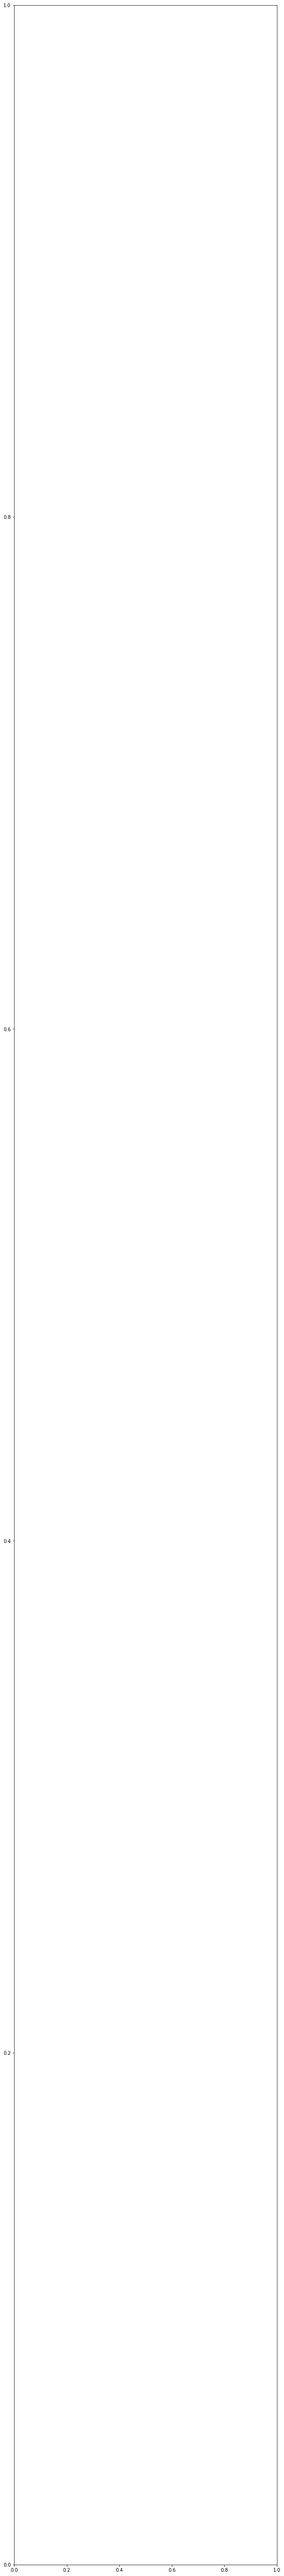

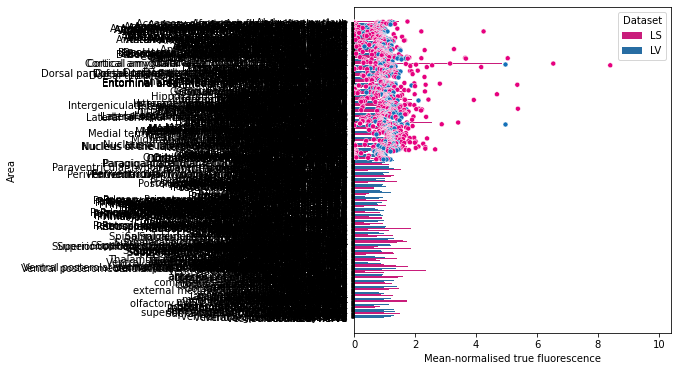

In [6]:
#btp.generate_whole_fluorescence_plot()
#btf.save(f'fluorescence_{title}', as_type='png')